## Basic definitions

### Determinant of Hessian matrix

In [1]:
using Plots

In [2]:
function cosphi(j1::Float64,j2::Float64,j3::Float64)

    res = (j2-j1)/(4*j3)

    res = real(res)

    res


end

function K(j1::Float64,j2::Float64,j3::Float64)

    res = sqrt(1 - 2 * ((complex(j1)-complex(j2))/(4 * complex(j3)))^2)

    res = real(res)

    res

end

function D(j1::Float64,j2::Float64,j3::Float64)

    res = 16 * j1^3 * j2^3 * j3^15 * (-1 + 2*cosphi(j1,j2,j3)^2 - 1im * K(j1,j2,j3) )
    res *= (-2 + cosphi(j1,j2,j3)^2 + 1im * K(j1,j2,j3))^2
    res *= (1 + cosphi(j1,j2,j3)^2 + (j1+j2)/(2*j3))^3
    res *= (1 + 2*cosphi(j1,j2,j3)^2 + (j1+j2)/(2*j3) - 1im * K(j1,j2,j3))^3
    res *= (1 + cosphi(j1,j2,j3)^2 + (1-cosphi(j1,j2,j3)^2) * (j1+j2)/j3 + 1im *
    K(j1,j2,j3)*(1- 3* cosphi(j1,j2,j3)^2))^3

    res
end


#----------------------------------------------


### VOLUME AND HEIGHT OF HYPERFRUSTUM

function vol_frusta(jin::Float64,jfin::Float64,k::Float64)

    res = 1/2. * k * (jin + jfin) * sqrt(complex(1 - ((jfin - jin)^2.) / (8 * k^2.)))

    res = real(res)

    res

end


function height_frusta(jin::Float64,jfin::Float64,k::Float64)

    res = (2*k)/(sqrt(jfin) + sqrt(jin)) * sqrt(complex(1 - (jfin - jin)^2 / (8 * k^2)))

    res = real(res)

    res

end

### sideface gives the spin of the side face as a function of top, bottom spins and height of hyperfrustum

function sideface(jin::Float64,jfin::Float64,H::Float64)

    res = sqrt(((sqrt(jin)+sqrt(jfin))/2*H)^2 + (jfin - jin)^2/8)

    res = real(res)

    res

end

function vol_3d_cube(j::Float64)

    res = j^(3/2)

    res

end

#### 3-volume of frustum

function vol_3d_frusta(jin::Float64,jfin::Float64,k::Float64)

    res = 1/3. * sqrt( complex((2 * k / (sqrt(jin) + sqrt(jfin)))^2 - ( 1/2 * (sqrt(jin) - sqrt(jfin)) )^2 )) *
     (jin + sqrt(jin * jfin) + jfin)

    real(res)

end


#### Dual lengths

# Dual length: spatial

function dual_len_sp(jin::Float64,jfin::Float64,k::Float64)

    if -1. /sqrt(2) <= (jfin - jin) / (4*k) <= 1. /sqrt(2)

        angle = acos(cosphi(jfin,jin,k)^2 / (1 - cosphi(jfin,jin,k)^2))

        res = 1/2. * (sqrt(jin) + sqrt(jfin)) * cos(pi/2 - angle)

    else

        res = 1/2. * (sqrt(jin) + sqrt(jfin))

    end

    res

end

# Dual length temporal (just the average of heights in slices n and n+1)

function dual_len_t(jin::Float64,jmid::Float64,jfin::Float64,k1::Float64,k2::Float64)

    res = 1/2. * (height_frusta(jin,jmid,k1) + height_frusta(jmid,jfin,k2))

    res

end


#----------------------------------------------


### REGGE ACTION AND CRITICAL ANGLE θ

function costheta(j1::Float64,j2::Float64,j3::Float64)

    res = cosphi(j1,j2,j3) / sqrt(complex(1-cosphi(j1,j2,j3)^2))

    res = real(res)

    res

end

function SRegge(j1::Float64,j2::Float64,j3::Float64)

    res = 6* (j1-j2) * (pi/2 - acos(costheta(j1,j2,j3))) + 12 * j3 * (pi/2 - acos(costheta(j1,j2,j3)^2))

    res = real(res)

    res

end




#----------------------------------------------




### VERTEX, EDGE AND FACE AMPLITUDES

function VAmp(G::Float64,γ::Float64,Lambda::Float64,j1::Float64,j2::Float64,j3::Float64)

    res = 0

    if -1. /sqrt(2) <= (j2 - j1) / (4*j3) <= 1. /sqrt(2)

        res = exp(1im *(1/(G))*SRegge(j1,j2,j3))/(-D(j1,j2,j3))
        res += exp(-1im *(1/(G))*SRegge(j1,j2,j3))/(-conj(D(j1,j2,j3)))
        res += 2*cos((1/(G)) * γ * SRegge(j1,j2,j3) - (1/(G)) * Lambda * vol_frusta(j1,j2,j3))/abs(D(j1,j2,j3))

        #res *= 1/(pi)^7 * (1./ sqrt(1 - γ^2))^21

    end

    #res = real(res)

    res

end


function EAmp(γ::Float64,j1::Float64,j2::Float64,j3::Float64)

    res = j3 * (1-cosphi(j1,j2,j3)^2) * (j1 + j2 + 2*j3 * (1 + cosphi(j1,j2,j3)^2))^2

    #res *= 1/(4*pi)^4 * (sqrt(1 - γ^2) / (8*pi))^3

    #res = real(res)

    res

end


function FAmp(alpha::Float64,γ::Float64,j::Float64)

    #res = (j^2*(1-γ^2))^α
    res = (j^2)^alpha

    #res = real(res)

    res

end

function Ampl(alpha::Float64,G::Float64,γ::Float64,Lambda::Float64,j1::Float64,j2::Float64,j3::Float64)

    res = VAmp(G,γ,Lambda,j1,j2,j3) * sqrt(EAmp(γ,j1,j1,j1)) * sqrt(EAmp(γ,j2,j2,j2)) * EAmp(γ,j1,j2,j3)^3
    res *= FAmp(alpha,γ,j1)^(3. /2.) * FAmp(alpha,γ,j2)^(3. /2.) * FAmp(alpha,γ,j3)^(3.)

    #res = real(res)

    real(res)
end

Ampl (generic function with 1 method)

### Vertex amplitude

In [3]:
function VAmpSU2(j1::Float64,j2::Float64,j3::Float64)

    res = 0.

    if -1. /sqrt(2) <= (j2 - j1) / (4*j3) <= 1. /sqrt(2) #&& iseven(convert(Int,2*(j1 + j2 + 4 * j3)))

        res += exp(1im * SRegge(j1,j2,j3))/(sqrt(-D(j1,j2,j3)))
        res += exp(-1im * SRegge(j1,j2,j3))/(sqrt(-conj(D(j1,j2,j3))))
        
        #res *= 1/(pi)^7 * (1./ sqrt(1 - γ^2))^21

    end

    res = real(res*(2 * pi)^(21/2) * 2^7 / (4 * pi)^14)

    #res

end

VAmpSU2 (generic function with 1 method)

In [4]:
VAmpSU2(1.5,0.5,1.5)

7.309006073614088e-9

# Data from calculating vertex amplitude

In [5]:
data = zeros(Complex{Float64},20,20,20);

data[1,1,1] = 6.316181269393268e-6 - 4.5020406640224853e-23im;
data[2,2,2] = 1.4181788658240369e-8 + 2.2183668645788633e-19im;
data[3,3,3] = 2.819966977706392e-10 + 1.4693325110117934e-18im;
data[4,4,4] = 1.626970056550521e-11 + 8.275238411549715e-18im;
data[5,5,5] = 1.7366198008557765e-12 - 2.215091099152354e-18im;
data[6,6,6] = 2.760867378819866e-13 + 1.6975867800675645e-19im;
data[7,7,7] = 5.784884974888215e-14 + 9.664028367734547e-20im;
data[8,8,8] = 1.4849408830184264e-14 - 2.042686485891054e-19im;

In [6]:
plotdata_semi = [VAmpSU2(i,i,i) for i in 0.5:0.5:4.0]

8-element Array{Float64,1}:
 6.175920332748446e-5
 4.264682761088191e-8
 6.038492212579382e-10
 2.944908300756667e-11
 2.8282424704304438e-12
 4.1697839762275783e-13
 8.263656664355177e-14
 2.0335592084351496e-14

In [7]:
plotdata_semi_fine = [VAmpSU2(i,i,i) for i in 0.5:0.01:4.0]

351-element Array{Float64,1}:
 6.175920332748446e-5
 5.0164892002679236e-5
 4.09120858942133e-5
 3.3495780338123203e-5
 2.752657974925984e-5
 2.2702751263939296e-5
 1.878937988375394e-5
 1.5602735491086733e-5
 1.2998486822288627e-5
 1.0862770604942093e-5
 9.105391037435776e-6
 7.654616954985463e-6
 6.453183146556619e-6
 ⋮
 2.7253100435629074e-14
 2.6528235047965798e-14
 2.5824431991389127e-14
 2.514102772216068e-14
 2.447738121616312e-14
 2.3832873150069457e-14
 2.3206905114258767e-14
 2.259889885617224e-14
 2.2008295552858672e-14
 2.1434555111514416e-14
 2.0877155496873128e-14
 2.0335592084351496e-14

In [8]:
plotdata_full = [real(data[i,i,i]) for i in 1:8]

8-element Array{Float64,1}:
 6.316181269393268e-6
 1.4181788658240369e-8
 2.819966977706392e-10
 1.626970056550521e-11
 1.7366198008557765e-12
 2.760867378819866e-13
 5.784884974888215e-14
 1.4849408830184264e-14

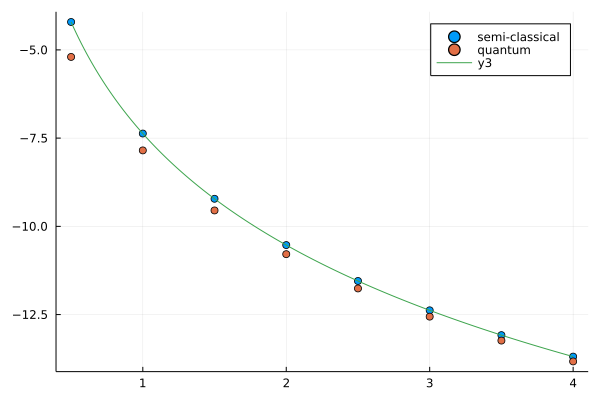

In [9]:
scatter(0.5:0.5:4.0,[ log.(10,plotdata_semi) log.(10,plotdata_full)], label = ["semi-classical" "quantum" ])
plot!(0.5:0.01:4.0, log.(10,plotdata_semi_fine))
#savefig("all_same.pdf")

In [10]:
rel_error = abs.(plotdata_full .- plotdata_semi) ./ (plotdata_full)

8-element Array{Float64,1}:
 8.777933959361658
 2.007154361033426
 1.1413343703374723
 0.8100568531669358
 0.6285904773380646
 0.5103166520117146
 0.42849109363922316
 0.3694546575494315

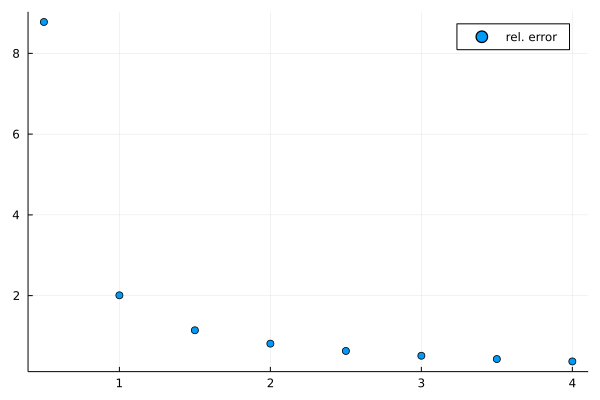

In [11]:
scatter(0.5:0.5:4.0,[ rel_error ],label = "rel. error")
#savefig("all_same_error.pdf")

Different set of amplitudes

In [12]:
data[1,2,1] = 0.0 + 0.0im;
data[2,4,2] = (-1.8571177582423352e-17 - 1.1786208994923902e-9im) * exp(1. * im * pi/2);
data[3,6,3] = 0.0 + 0.0im;
data[4,8,4] = (4.89130248941279e-13 - 2.6786914759749638e-20im) * exp( im * pi);
#data[5,10,5] = 0.0 + 0.0im;
#data[6,12,6] = 2.760867378819866e-13 + 1.6975867800675645e-19im;
#data[7,7,7] = 5.784884974888215e-14 + 9.664028367734547e-20im;
#data[8,8,8] = 1.4849408830184264e-14 - 2.042686485891054e-19im;

In [13]:
data[1,3,1] = 0.0 + 0.0im;
data[2,5,2] = 0.0 + 0.0im;
data[3,7,3] = 0.0 + 0.0im;
data[4,9,4] = 0.0 + 0.0im;
#data[5,11,5] = 0.0 + 0.0im;

In [14]:
plotdata_semi_2 = [VAmpSU2(i,2*i,i) * i^(21/2) for i in 1.0:1.0:10.0]

10-element Array{Float64,1}:
  5.337555671851428e-9
  1.8088708230536424e-9
 -2.731167085995469e-9
 -5.744189270496459e-9
 -5.545592734998257e-9
 -2.246414271830981e-9
  2.308751031000823e-9
  5.573076550912516e-9
  5.721453738336161e-9
  2.670923810002174e-9

In [15]:
plotdata_semi_fine_2 = [VAmpSU2(i,2*i,i) * i^(21/2) for i in 1.0:0.01:8.0]

701-element Array{Float64,1}:
 5.337555671851428e-9
 5.314894637779142e-9
 5.291921464995336e-9
 5.2686375026926195e-9
 5.245044118315966e-9
 5.221142697482426e-9
 5.196934643899729e-9
 5.172421379283862e-9
 5.147604343275558e-9
 5.122484993355758e-9
 5.0970648047600175e-9
 5.071345270391853e-9
 5.045327900735078e-9
 ⋮
 5.3461192242572405e-9
 5.368346840575061e-9
 5.390259178984283e-9
 5.411854952594089e-9
 5.433132893105232e-9
 5.454091750884473e-9
 5.47473029503802e-9
 5.495047313483779e-9
 5.5150416130225675e-9
 5.534712019408175e-9
 5.554057377416317e-9
 5.573076550912516e-9

In [16]:
plotdata_semi_2_2 = [VAmpSU2(i,2*i+0.5,i) * i^(21/2) for i in 0.5:1.0:8.0]

8-element Array{Float64,1}:
  1.1891051205156416e-10
 -1.0153461372703844e-9
 -3.756239223609361e-9
 -4.906401070196357e-9
 -3.2937191966976773e-9
  3.543048539124621e-10
  3.997054780649498e-9
  5.5171738698242104e-9

In [17]:
plotdata_semi_fine_2_2 = [VAmpSU2(i,2*i+0.5,i) * i^(21/2) for i in 0.5:0.01:8.0]

751-element Array{Float64,1}:
 1.1891051205156416e-10
 1.3751097203699546e-10
 1.5478669157895038e-10
 1.708143562347181e-10
 1.8566098035935565e-10
 1.9938551806998111e-10
 2.120401661492913e-10
 2.2367142466302244e-10
 2.343209655851441e-10
 2.4402634822070923e-10
 2.5282161158362405e-10
 2.6073776735062437e-10
 2.678032120215457e-10
 ⋮
 5.2736454661574795e-9
 5.261056411776197e-9
 5.248156747409574e-9
 5.234947156602027e-9
 5.221428341549297e-9
 5.207601023059116e-9
 5.1934659405106405e-9
 5.179023851812517e-9
 5.164275533360436e-9
 5.14922177999271e-9
 5.133863404945575e-9
 5.118201239806806e-9

In [18]:
plotdata_full_2 = [real.(data[i,2*i,i]) * (i/2)^(21/2) for i in 2:2:4] 

2-element Array{Float64,1}:
  1.1786208994923902e-9
 -7.083362629833574e-10

In [19]:
(-1.8571177582423352e-17 - 1.1786208994923902e-9im) * exp(1. * im * pi/2)

1.1786208994923902e-9 - 1.8571177654593068e-17im

In [20]:
(4.89130248941279e-13 - 2.6786914759749638e-20im) * exp(1. * im * pi)

-4.89130248941279e-13 + 2.6786914819650816e-20im

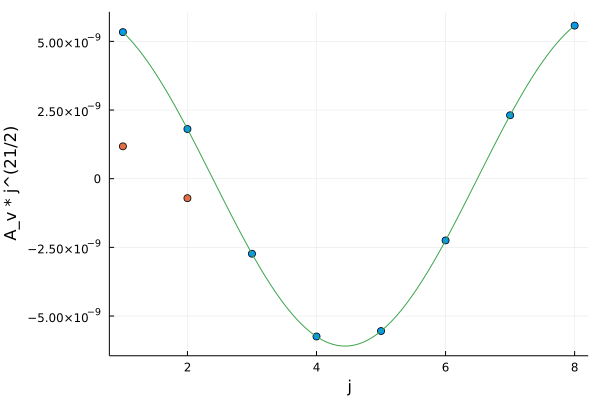

In [21]:
#scatter(1.0:1.0:2.0,[ plotdata_semi_2 real.(plotdata_full_2)], label = ["semi-classical" "quantum" ])
scatter(1.0:1.0:8.0,[ plotdata_semi_2 ], label = ["semi-classical"], legend = false, xlabel = "j", ylabel = "A_v * j^(21/2)")
scatter!(1.0:1.0:2.0,[ plotdata_full_2], label = ["quantum" ])
frusta_uniform_scaling = plot!(1.0:0.01:8.0, [ plotdata_semi_fine_2 ])
#savefig("all_same.pdf")

In [22]:
savefig(frusta_uniform_scaling,"frusta_uniform_scaling.pdf")

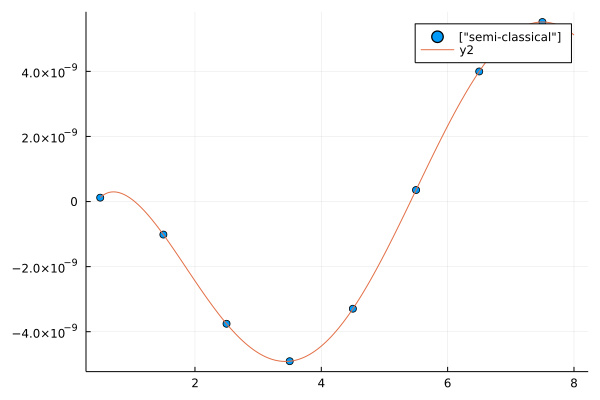

In [23]:
#scatter(1.0:1.0:2.0,[ plotdata_semi_2 real.(plotdata_full_2)], label = ["semi-classical" "quantum" ])
scatter(0.5:1.0:8.0,[ plotdata_semi_2_2 ], label = ["semi-classical"])
plot!(0.5:0.01:8.0,[ plotdata_semi_fine_2_2])
#scatter!(1.0:1.0:2.0,[ plotdata_full_2], label = ["quantum" ])
#savefig("all_same.pdf")

In [24]:
rel_error_2 = abs.(abs.(plotdata_full_2 .- plotdata_semi_2[1:2]) ./ (plotdata_full_2))

2-element Array{Float64,1}:
 3.528645024155106
 3.5536894234880396

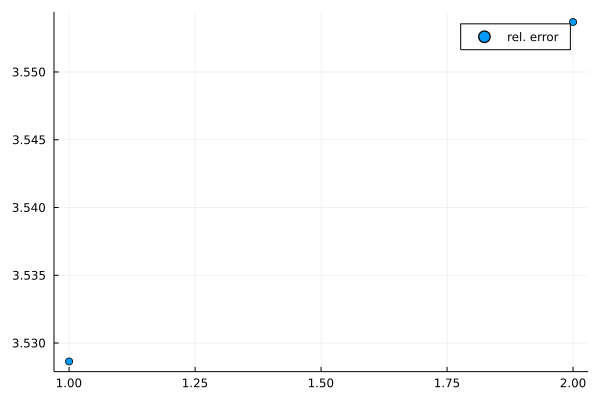

In [25]:
scatter(1.0:1.0:2.0,[ rel_error_2 ],label = "rel. error")
#savefig("all_same_error.pdf")

In [26]:
data[1,3,3] = (3.2362639557436895e-15 - 1.9299930758040444e-9im) * exp(1. * im * pi/2);
data[1,4,4] = 0.0 + 0.0im;
data[1,5,5] = (-4.552916339920018e-12 - 8.740790133939084e-17im) * exp(1. * im * pi);
data[1,6,6] = 0.0 + 0.0im;
data[1,7,7] = (1.0047520318481687e-17 - 1.4625158805543972e-12im) * exp(1. * im * 3*pi/2);
data[1,8,8] = 0.0 + 0.0im;
data[1,9,9] = (-2.8324945505422234e-13 - 7.4909148700269155e-19im) * exp(1. * im * 4*pi/2);
data[1,10,10] = 0.0 + 0.0im;
data[1,11,11] = (-1.51770095550521e-21 + 4.2348522276035234e-14im) * exp(1. * im * pi/2);

In [27]:
plotdata_semi_3 = [VAmpSU2(0.5,i,i) * i^9. for i in 0.5:1.0:10.0] #* i^18.

10-element Array{Float64,1}:
  1.206234439989931e-7
  2.8098274716200413e-7
  2.0543840462327718e-7
 -4.122619513008153e-8
 -2.997333833984812e-7
 -4.059068219773439e-7
 -2.859795676498486e-7
  5.684995978427185e-10
  2.948524139782011e-7
  4.2956744600732324e-7

In [28]:
plotdata_semi_fine_3 = [VAmpSU2(0.5,i,i) * i^9. for i in 0.5:0.05:10.0] #* i^18.

191-element Array{Float64,1}:
 1.206234439989931e-7
 1.3394497902986863e-7
 1.4675491880398828e-7
 1.5903847062018176e-7
 1.7078604839403157e-7
 1.8199045317344104e-7
 1.9264545975674602e-7
 2.027451473130338e-7
 2.1228362369188066e-7
 2.2125495514577662e-7
 2.2965319937809148e-7
 2.3747248649851903e-7
 2.447071180608663e-7
 ⋮
 4.2837607019042747e-7
 4.2956744600732324e-7
 4.3013092120424856e-7
 4.300651233379024e-7
 4.2936961137296317e-7
 4.2804487690396226e-7
 4.260923439871178e-7
 4.2351436758211283e-7
 4.2031423060587084e-7
 4.1649613960242e-7
 4.120652190350367e-7
 4.070275042088416e-7

In [29]:
plotdata_full_3 = [real.(data[1,i,i]) * (i/2)^9. for i in 1:2:11] #* ((i+1)/2.)^18.

6-element Array{Float64,1}:
  1.2336291541783727e-8
  7.419541740439649e-8
  1.7367997512512276e-8
 -1.1526912319365446e-7
 -2.143293796603327e-7
 -1.950304693711706e-7

In [30]:
(3.2362639557436895e-15 - 1.9299930758040444e-9im) * exp(1. * im * pi/2)

1.9299930758040444e-9 + 3.2362639556255114e-15im

In [31]:
(-4.552916339920018e-12 - 8.740790133939084e-17im) * exp(1. * im * pi)

4.552916339920018e-12 + 8.740790133883326e-17im

In [32]:
(1.0047520318481687e-17 - 1.4625158805543972e-12im) * exp(1. * im * 3*pi/2)

-1.4625158805543972e-12 - 1.0047520318213027e-17im

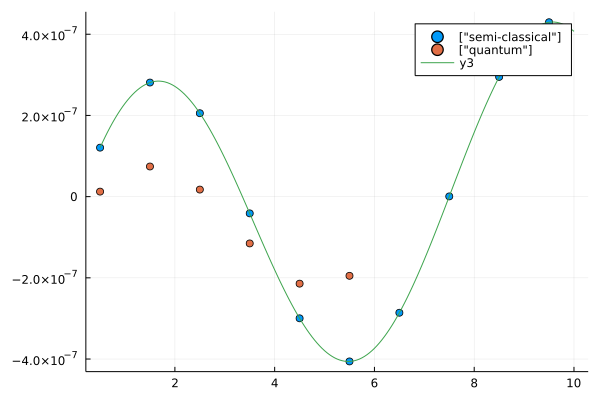

In [33]:
#scatter(0.5:1.0:4.0,[ abs.(plotdata_semi_3)  abs.(plotdata_full_3)], label = ["semi-classical" "quantum" ])
scatter(0.5:1.0:10.0,[ plotdata_semi_3 ], label = ["semi-classical"])
scatter!(0.5:1.0:5.5,[ plotdata_full_3], label = ["quantum" ])
plot!(0.5:0.05:10.0, [ plotdata_semi_fine_3] )
#savefig("all_same.pdf")

In [34]:
rel_error_3 = abs.(abs.(plotdata_full_3 .- plotdata_semi_3[1:6]) ./ (plotdata_full_3))

6-element Array{Float64,1}:
  8.777933959361658
  2.7870633657942645
 10.828560228389886
  0.6423483237499718
  0.398470820349016
  1.0812482443696823

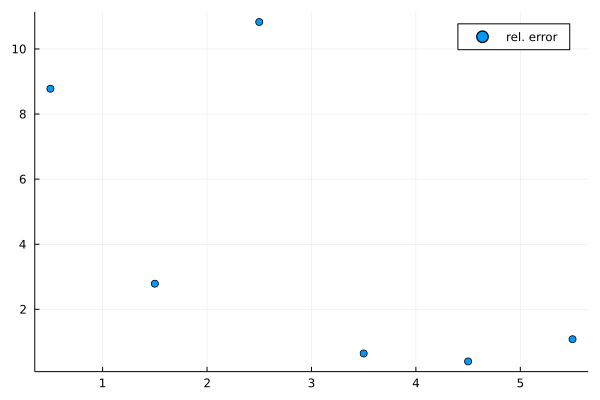

In [35]:
scatter(0.5:1.0:5.5,[ rel_error_3 ],label = "rel. error")
#savefig("all_same_error.pdf")

In [36]:
data[2,3,3] = 0.0 + 0.0im;
data[2,4,4] = (-1.1245105587286166e-19 - 6.354074524300945e-11im);
data[2,5,5] = 0.0 + 0.0im;
data[2,6,6] = (-9.164934625333708e-13 - 8.769016658293247e-20im);
data[2,7,7] = 0.0 + 0.0im;
data[2,8,8] = 2.2165512644820985e-20 - 1.0297208274436852e-13im;
data[2,9,9] = 0.0 + 0.0im;
data[2,10,10] = -3.71444678595188e-14 - 3.529303400957975e-21im;

In [37]:
plotdata_semi_4 = [VAmpSU2(1.0,i,i) * i^9. for i in 1.0:1.0:10.0]

10-element Array{Float64,1}:
  4.264682761088191e-8
  8.116752098016094e-8
  7.595212517043143e-8
  1.619346834548358e-8
 -6.761787335243236e-8
 -1.2478579645379593e-7
 -1.1705723373581163e-7
 -4.319715753085456e-8
  5.857005608761346e-8
  1.316470623900561e-7

In [38]:
plotdata_semi_fine_4 = [VAmpSU2(1.0,i,i) * i^9. for i in 1.0:0.01:10.0]

901-element Array{Float64,1}:
 4.264682761088191e-8
 4.312620718249302e-8
 4.36047859362397e-8
 4.4082552937808516e-8
 4.45594954092219e-8
 4.503559879722047e-8
 4.551084684008462e-8
 4.598522163288115e-8
 4.645870369112893e-8
 4.693127201288245e-8
 4.7402904139235415e-8
 4.787357621325384e-8
 4.8343263037348726e-8
 ⋮
 1.265990631880013e-7
 1.2709433069449038e-7
 1.2758241703757183e-7
 1.2806329120171907e-7
 1.2853692258743566e-7
 1.2900328101320796e-7
 1.2946233671742838e-7
 1.2991406036029916e-7
 1.3035842302571008e-7
 1.3079539622308472e-7
 1.3122495188921505e-7
 1.316470623900561e-7

In [39]:
plotdata_full_4 = [real.(data[2,2*i,2*i] * exp(im * (i-1) * pi/2)) * ((i))^9. for i in 1:5]

5-element Array{Float64,1}:
  1.4181788658240369e-8
  3.253286156442084e-8
  1.803934082304434e-8
 -2.6993513658939743e-8
 -7.254778878812266e-8

In [40]:
(-2.947836959073545e-14 - 1.665682512098347e-5im) * exp(1. *im * pi/2)

1.665682512098347e-5 - 2.9478370610671825e-14im

In [41]:
(-0.0003550683454199817 - 3.3972967218051156e-11im) * exp(1. * im * pi)

0.0003550683454199817 + 3.397296717456782e-11im

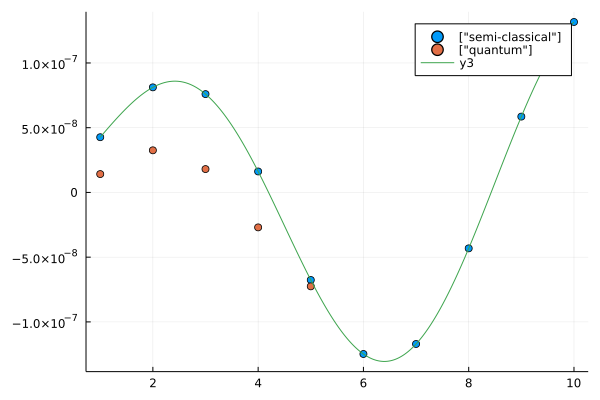

In [42]:
scatter(1.0:1.0:10.0,[ plotdata_semi_4  ], label = ["semi-classical"])
scatter!(1.0:1.0:5.0,[ plotdata_full_4 ], label = [ "quantum" ])
plot!(1.0:0.01:10.0, [ plotdata_semi_fine_4  ])
#savefig("all_same.pdf")

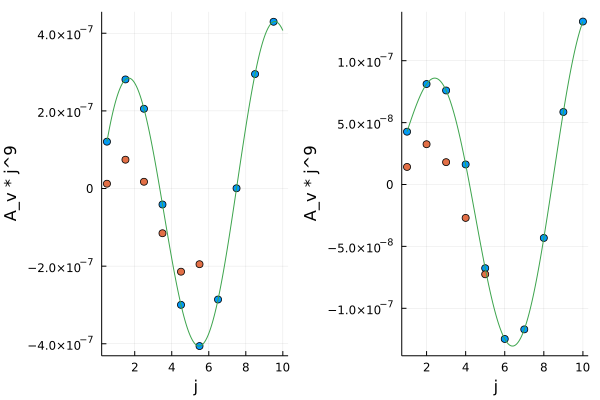

In [43]:
scatter(0.5:1.0:10.0,[ plotdata_semi_3 ], label = ["semi-classical"], legend = false, xlabel = "j", ylabel = "A_v * j^9")
scatter!(0.5:1.0:5.5,[ plotdata_full_3], label = ["quantum" ])
plot_2_1 = plot!(0.5:0.05:10.0, [ plotdata_semi_fine_3] )
scatter(1.0:1.0:10.0,[ plotdata_semi_4  ], label = ["semi-classical"],legend = false, xlabel = "j", ylabel = "A_v * j^9")
scatter!(1.0:1.0:5.0,[ plotdata_full_4 ], label = [ "quantum" ])
plot_2_2 = plot!(1.0:0.01:10.0, [ plotdata_semi_fine_4  ])

frusta_small_cube = plot(plot_2_1,plot_2_2,layout = (1,2))

In [44]:
savefig(frusta_small_cube,"frusta_small_cube.pdf")

In [45]:
rel_error_4 = abs.(abs.(plotdata_full_4 .- plotdata_semi_4[1:5]) ./ (plotdata_full_4))

5-element Array{Float64,1}:
 2.007154361033426
 1.4949394881675209
 3.210360340517901
 1.5999022042882738
 0.06795404130218521

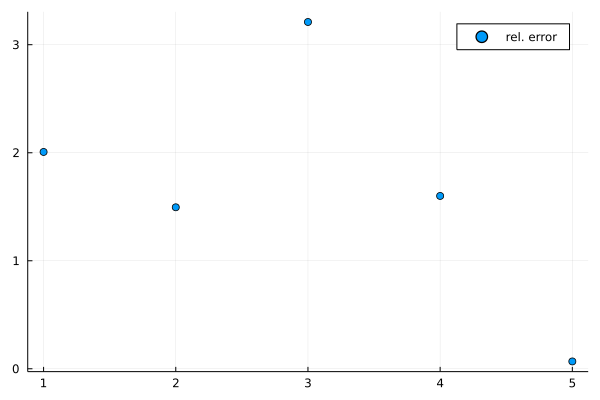

In [46]:
scatter(1.0:1.0:5.0,[ rel_error_4 ],label = "rel. error")
#savefig("all_same_error.pdf")

In [47]:
data[3,3,1] = 3.1000636893397794e-8 + 7.150256774609569e-14im;
data[3,3,2] = 1.8820618661894542e-9 + 4.1432147895199226e-15im;
data[3,3,3] = 2.8199371662135256e-10 - 5.383253908845299e-15im;
data[3,3,4] = 6.514457890456685e-11 + 1.8752241583712454e-15im;
data[3,3,5] = 1.947757530950653e-11 - 3.09098737271937e-16im;
data[3,3,6] = 6.945485923895442e-12 + 4.265505033672928e-17im;
#data[3,3,7] = 5.784884974888215e-14 + 9.664028367734547e-20im;
#data[3,3,9] = 1.4849408830184264e-14 - 2.042686485891054e-19im;
#data[3,3,10] = 1.4849408830184264e-14 - 2.042686485891054e-19im;

In [48]:
plotdata_semi_5 = [VAmpSU2(1.5,1.5,i) for i in 0.5:0.5:3.0]

6-element Array{Float64,1}:
 9.8071105958387e-8
 4.608652605446088e-9
 6.038492212579382e-10
 1.2701884447579452e-10
 3.548885876421233e-11
 1.2019042174558993e-11

In [49]:
plotdata_full_5 = [real.(data[3,3,i]) for i in 1:6]

6-element Array{Float64,1}:
 3.1000636893397794e-8
 1.8820618661894542e-9
 2.8199371662135256e-10
 6.514457890456685e-11
 1.947757530950653e-11
 6.945485923895442e-12

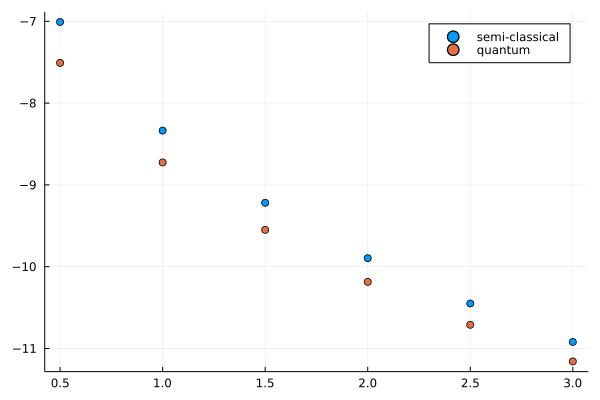

In [50]:
scatter(0.5:0.5:3.0,[ log.(10,plotdata_semi_5)  log.(10,plotdata_full_5)], label = ["semi-classical" "quantum" ])
#savefig("all_same.pdf")

In [51]:
rel_error_5 = abs.(plotdata_full_5 .- plotdata_semi_5) ./ (plotdata_full_5)

6-element Array{Float64,1}:
 2.163519068838008
 1.4487253518276038
 1.1413570078540352
 0.949799148473582
 0.8220367884749534
 0.7304825474065605

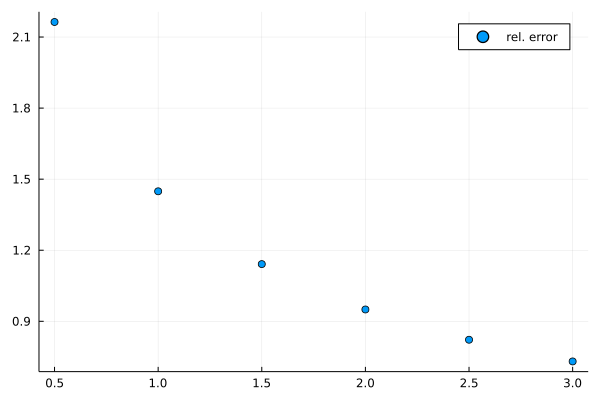

In [52]:
scatter(0.5:0.5:3.0,[ rel_error_5 ],label = "rel. error")
#savefig("all_same_error.pdf")

In [53]:
data[1,3,1] = -4.031472546575322e-13 + 1.2530980625371163e-7im;
data[1,3,2] = 1.4356875092091113e-14 - 1.004769199833231e-8im;
data[1,3,3] = 3.2362639558708318e-15 - 1.929993075804103e-9im;
data[1,3,4] = 8.189953493892411e-16 - 4.573898400389363e-10im;
data[1,3,5] = 2.4887969680491367e-16 - 1.3392324524028857e-10im;
data[1,3,6] = 8.339972796728647e-17 - 4.6056591901432484e-11im;
data[1,3,7] = 3.5615446369050864e-17 - 1.8071356921238964e-11im;
data[1,3,8] = 1.5735405133456997e-17 - 7.81935583063174e-12im;
data[1,3,9] = 7.519282041895174e-18 - 3.6743594759101844e-12im;
data[1,3,10] = 3.835148722785212e-18 - 1.8471127491603597e-12im;
data[1,3,11] = 2.0483381300258534e-18 - 9.827521071575355e-13im;
data[1,3,12] = 1.157585389191416e-18 - 5.488586551383017e-13im;
data[1,3,13] = 6.771961334183327e-19 - 3.1949513774739236e-13im;

In [54]:
plotdata_full_6 = [real.(data[1,3,i] * exp(im * pi/2)) * (i/2.)^(14/2.) for i in 1:13]

13-element Array{Float64,1}:
 -9.789828613571221e-10
  1.004769199833231e-8
  3.297574106862167e-8
  5.8545899524983845e-8
  8.174026198748081e-8
  1.0072576648843284e-7
  1.1626983978896797e-7
  1.2811232592907043e-7
  1.3729958959480203e-7
  1.443056835281531e-7
  1.4961764345929076e-7
  1.5364529648479564e-7
  1.5662379751843432e-7

In [55]:
plotdata_semi_6 = [VAmpSU2(0.5,1.5,i) * i^(14/2.) for i in 0.5:0.5:10.0]

20-element Array{Float64,1}:
 1.3453188708164111e-9
 6.349421941470082e-8
 1.2488122096089074e-7
 1.7349295403682541e-7
 2.0927937045372548e-7
 2.3500211868594823e-7
 2.5330372689420076e-7
 2.6621203751984787e-7
 2.751957298916489e-7
 2.813039921421363e-7
 2.852878553445046e-7
 2.8768931414557214e-7
 2.8890357928473845e-7
 2.8922197445788166e-7
 2.88861523528484e-7
 2.879855071668204e-7
 2.867178899382671e-7
 2.8515355916924145e-7
 2.833656746019624e-7
 2.814110033120993e-7

In [56]:
plotdata_semi_fine_6 = [VAmpSU2(0.5,1.5,i) * i^(14/2.) for i in 0.5:0.01:10.0]

951-element Array{Float64,1}:
 1.3453188708164111e-9
 2.5394089069311698e-9
 3.7194231381054167e-9
 4.889424409414526e-9
 6.052719018077111e-9
 7.2120035973249564e-9
 8.369479291535149e-9
 9.526941518689669e-9
 1.0685851261390583e-8
 1.184739221098378e-8
 1.301251695785037e-8
 1.4181984615602756e-8
 1.5356391685216717e-8
 ⋮
 2.818529206246085e-7
 2.818130008374952e-7
 2.817730291796995e-7
 2.817330059769955e-7
 2.8169293155357284e-7
 2.8165280623204314e-7
 2.81612630333447e-7
 2.815724041772656e-7
 2.8153212808142564e-7
 2.8149180236230965e-7
 2.814514273347625e-7
 2.814110033120993e-7

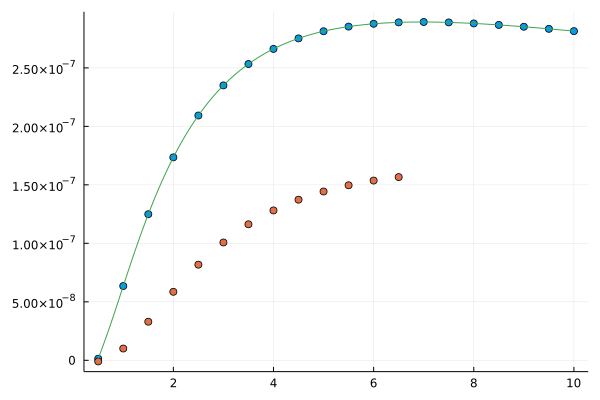

In [57]:
scatter(0.5:0.5:10.0,[ plotdata_semi_6], legend=false )
scatter!(0.5:0.5:6.5,[ plotdata_full_6] )
plot!(0.5:0.01:10., plotdata_semi_fine_6)
#savefig("all_same.pdf")

In [58]:
rel_error_6 = abs.(abs.(plotdata_full_6 .- plotdata_semi_6[1:13]) ./ (plotdata_full_6))

13-element Array{Float64,1}:
 2.3742006361086374
 5.31928401320815
 2.7870633657941495
 1.9633664431578017
 1.5602972802531305
 1.3330884130123293
 1.1785849826055663
 1.07795803869205
 1.0043448833591229
 0.9493618356844254
 0.9067794997194173
 0.8724251293565708
 0.8445701346931973

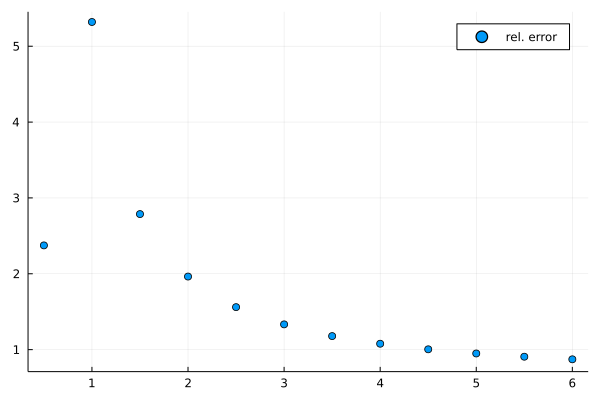

In [59]:
scatter(0.5:0.5:6.0,[ rel_error_6 ],label = "rel. error")
#savefig("all_same_error.pdf")

In [60]:
data[2,4,1] = -4.292067895155987e-17 + 1.3408227572536222e-8im;
data[2,4,2] = -1.8571176592750014e-17 - 1.1786208994923916e-9im;
data[2,4,3] = -6.668707766434286e-18 - 2.4617134054874496e-10im;
data[2,4,4] = -1.1245105587286166e-19 - 6.354074524300945e-11im;
data[2,4,5] = 2.065999666021163e-18 - 2.0077085211612134e-11im;
data[2,4,6] = -8.703750427287336e-20 - 7.38235857492669e-12im;
data[2,4,7] = -2.327936444736543e-20 - 3.0556066051164156e-12im;
data[2,4,8] = -1.7561644724082828e-20 - 1.3843897306030417e-12im;
data[2,4,9] = -4.549395832734482e-21 - 6.773747955316706e-13im;
data[2,4,10] = -1.1282583330439803e-21 - 3.522447118751976e-13im;

In [61]:
plotdata_full_7 = [real.(data[2,4,i] * exp(im * pi/2)) * (i/2.)^(14/2.) for i in 1:10]

10-element Array{Float64,1}:
 -1.0475177791043923e-10
  1.1786208994923916e-9
  4.206068138907072e-9
  8.13321539110521e-9
  1.2254080329353109e-8
  1.614521820336467e-8
  1.9659558049979596e-8
  2.2681841346200236e-8
  2.5311426940697805e-8
  2.7519118115249812e-8

In [62]:
plotdata_semi_7 = [VAmpSU2(1.0,2.0,i) * i^(14/2.) for i in 0.5:0.5:8.]

16-element Array{Float64,1}:
 1.669620454512383e-11
 5.337555671851428e-9
 1.277653914991861e-8
 2.0291880245040235e-8
 2.6963936860997e-8
 3.257241007182938e-8
 3.716885109494779e-8
 4.088879857613655e-8
 4.387888488210885e-8
 4.627153570536278e-8
 4.817844362503421e-8
 4.9691022530091455e-8
 5.088310286036574e-8
 5.181402200792263e-8
 5.253144806127781e-8
 5.307375159293536e-8

In [63]:
plotdata_semi_fine_7 = [VAmpSU2(1.0,2.0,i) * i^(14/2.) for i in 0.5:0.01:8.]

751-element Array{Float64,1}:
 1.669620454512383e-11
 9.666916531771504e-11
 1.7645430598484973e-10
 2.5633947925310515e-10
 3.365629983141444e-10
 4.1732303561331714e-10
 4.987849185883552e-10
 5.810868599093041e-10
 6.643445061374867e-10
 7.486545835658766e-10
 8.340978465963386e-10
 9.207414818841347e-10
 1.0086410839076515e-9
 ⋮
 5.296779235646533e-8
 5.297772020232026e-8
 5.298758832388326e-8
 5.2997396951975924e-8
 5.3007146316451694e-8
 5.301683664620015e-8
 5.302646816915186e-8
 5.303604111228261e-8
 5.3045555701617525e-8
 5.3055012162235805e-8
 5.306441071827507e-8
 5.307375159293536e-8

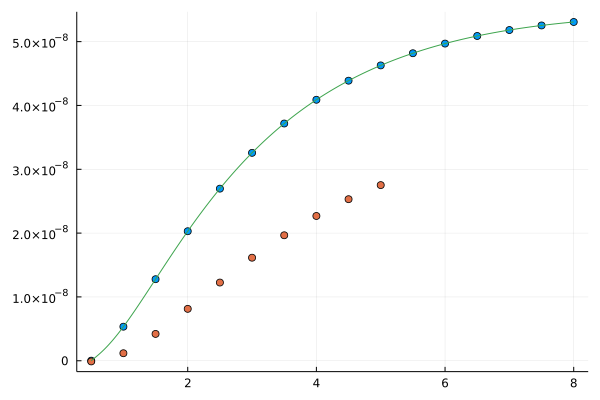

In [64]:
scatter(0.5:0.5:8.0,[ plotdata_semi_7], label = ["semi-classical" ],legend = false)
scatter!(0.5:0.5:5.0, plotdata_full_7, label = "quantum")
plot!(0.5:0.01:8., plotdata_semi_fine_7)
#savefig("all_same.pdf")

In [65]:
rel_error_7 = abs.(abs.(plotdata_full_7 .- plotdata_semi_7[1:10]) ./ (plotdata_full_7))

10-element Array{Float64,1}:
 1.1593882688979158
 3.5286450241551
 2.037644357620544
 1.4949394881675209
 1.2004047742700263
 1.0174648407688462
 0.8906249571050946
 0.8027107214109152
 0.7335603000539155
 0.681432359553748

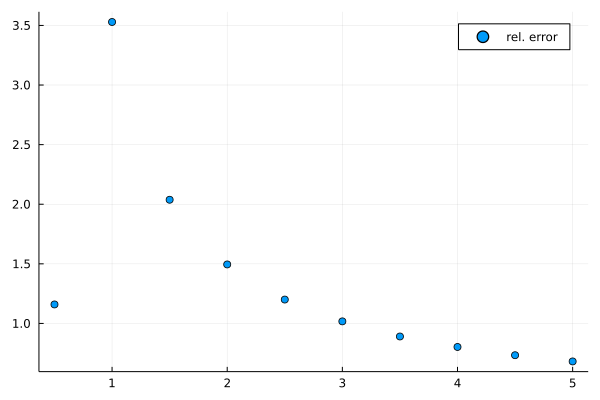

In [66]:
scatter(0.5:0.5:5.0,[ rel_error_7 ],label = "rel. error")
#savefig("all_same_error.pdf")

In [67]:
data[1,5,1] = 4.8846497092823365e-8 - 8.691691352417807e-15im;
data[1,5,2] = 3.7197474186919663e-9 + 8.519618797735853e-15im;
data[1,5,3] = 4.0675631952215073e-10 - 1.0427659283215629e-15im;
data[1,5,4] = 2.9246195430278194e-11 - 3.2869247790948376e-16im;
data[1,5,5] = -4.552916339920018e-12 - 8.740790133939084e-17im;
data[1,5,6] = -4.764739951269006e-12 - 2.3235473659614842e-17im;
data[1,5,7] = -2.8023731806989393e-12 - 6.628429756228639e-18im;
data[1,5,8] = -1.5238855623982602e-12 - 1.4908472513576514e-18im;
data[1,5,9] = -8.346763666822759e-13 - 1.1897387141077932e-19im;
data[1,5,10] = -4.678548156846402e-13 + 1.817047292297724e-19im;
data[1,5,11] = -2.702804557511257e-13 + 1.9922549078920782e-19im;
data[1,5,12] = -1.6089337990100215e-13 + 1.727328003096168e-19im;

In [68]:
plotdata_full_8 = [real.(data[1,5,i] * exp(im * pi) ) * (i/2.)^(14/2.) for i in 1:12]

12-element Array{Float64,1}:
 -3.8161325853768254e-10
 -3.7197474186919663e-9
 -6.949813053085497e-9
 -3.743513015075609e-9
  2.778879602001964e-9
  1.0420486273425315e-8
  1.803027200275271e-8
  2.4967341054333095e-8
  3.11893061474528e-8
  3.655115747536252e-8
  4.114844889984469e-8
  4.503984919596694e-8

In [69]:
plotdata_semi_8 = [VAmpSU2(0.5,2.5,i) * i^(14/2.) for i in 0.5:0.5:8.0]

16-element Array{Float64,1}:
  0.0
 -1.5807715456972042e-8
 -6.487331019318355e-9
  1.3552452808046745e-8
  3.287014473972435e-8
  4.916887756725435e-8
  6.23363362883914e-8
  7.280853945520027e-8
  8.109248786454403e-8
  8.763515434944186e-8
  9.279937675721189e-8
  9.68710012134681e-8
  1.0007301702599292e-7
  1.0257922468014573e-7
  1.0452554097393862e-7
  1.0601882876094938e-7

In [70]:
plotdata_semi_fine_8 = [VAmpSU2(0.5,2.5,i) * i^(14/2.) for i in 0.5:0.01:8.0]

751-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 1.0572457319183085e-7
 1.0575207915483248e-7
 1.0577943216780039e-7
 1.058066328559574e-7
 1.0583368184167827e-7
 1.0586057974449889e-7
 1.0588732718113632e-7
 1.0591392476549877e-7
 1.0594037310870377e-7
 1.0596667281908888e-7
 1.059928245022291e-7
 1.0601882876094938e-7

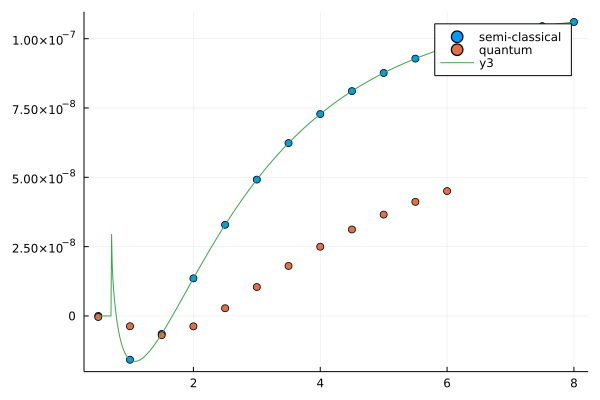

In [71]:
scatter(0.5:0.5:8.0, plotdata_semi_8 , label = "semi-classical")
scatter!(0.5:0.5:6.0, plotdata_full_8, label = "quantum")
plot!(0.5:0.01:8.0, plotdata_semi_fine_8)
#savefig("all_same.pdf")

In [72]:
rel_error_8 = abs.(abs.(plotdata_full_8 .- plotdata_semi_8[1:12]) ./ (plotdata_full_8))

12-element Array{Float64,1}:
  1.0
  3.249674420778484
  0.06654596752956035
  4.620249950639753
 10.828560228389886
  3.718482062842549
  2.457315357132406
  1.916151115040915
  1.6000093583731991
  1.397602713635341
  1.2552338967402035
  1.1507843152845711

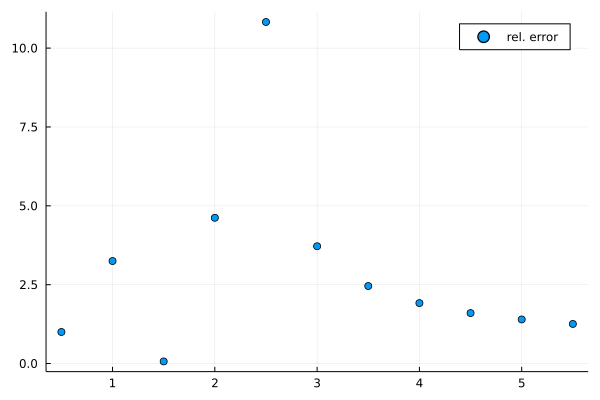

In [73]:
scatter(0.5:0.5:5.5,[ rel_error_8 ],label = "rel. error")
#savefig("all_same_error.pdf")

In [74]:
data[3,1,1] = 4.727515212723712e-14 - 1.2531022964052283e-7im;
data[3,1,2] = 7.868521429728249e-16 + 1.0048058749312867e-8im;
data[3,1,3] = 4.506859891324551e-17 + 1.930231306524873e-9im;
data[3,1,4] = -2.0081691168598603e-18 + 4.573985360224739e-10im;
data[3,1,5] = -3.192321696662391e-18 + 1.3392871961201839e-10im;
#data[3,1,6] = 8.339972796728647e-17 - 4.6056591901432484e-11im;
#data[3,1,7] = 3.5615446369050864e-17 - 1.8071356921238964e-11im;
#data[1,3,8] = 1.5735405133456997e-17 - 7.81935583063174e-12im;
#data[1,3,9] = 7.519282041895174e-18 - 3.6743594759101844e-12im;

In [75]:
plotdata_full_9 = [real.(data[3,1,i] * exp(-im * pi/2)) * (i/2.)^(14/2.) for i in 1:5]

5-element Array{Float64,1}:
 -9.789861690665846e-10
  1.0048058749312867e-8
  3.297981146382732e-8
  5.854701261087666e-8
  8.174360327881982e-8

In [76]:
plotdata_semi_9 = [VAmpSU2(1.5,0.5,i) * i^(14/2.) for i in 0.5:0.5:2.5]

5-element Array{Float64,1}:
 1.3453188708163514e-9
 6.349421941470082e-8
 1.2488122096089071e-7
 1.7349295403682536e-7
 2.0927937045372542e-7

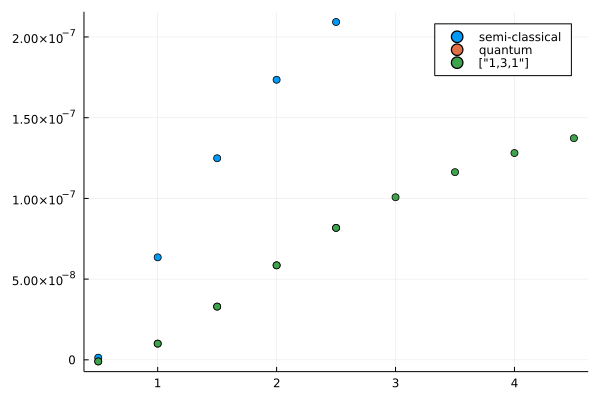

In [77]:
scatter(0.5:0.5:2.5,[ plotdata_semi_9 plotdata_full_9], label = ["semi-classical" "quantum" ])
scatter!(0.5:0.5:4.5,[ plotdata_full_6], label = ["1,3,1" ])
#savefig("all_same.pdf")

In [78]:
data[2,6,1] = 7.905596904274289e-9 + 4.037891755752924e-16im;
data[2,6,2] = 6.151081891159678e-10 + 7.313435655800068e-16im;
data[2,6,3] = 6.870410222727061e-11 + 1.0824693863155169e-16im;
data[2,6,4] = 5.222497675584798e-12 + 1.6877276151872396e-17im;
data[2,6,5] = -8.213501051358313e-13 + 2.4064488654748647e-18im;
data[2,6,7] = -5.634031289483407e-13 - 2.743643196164726e-19im;
data[2,6,8] = -3.1923740440975616e-13 - 2.1362828725147995e-19im;
data[2,6,9] = -1.8057467971908436e-13 - 1.5729399555657798e-19im;
data[2,6,10] = -1.0420675573735214e-13 - 9.109239567184228e-20im;

In [79]:
plotdata_full_10 = [real.(data[2,6,i] * exp(-im * pi)) * (i/2.)^(14/2.) for i in 1:10]

10-element Array{Float64,1}:
 -6.176247581464288e-11
 -6.151081891159678e-10
 -1.1738739966487564e-9
 -6.684797024748541e-10
  5.013123200291939e-10
  2.004371202560482e-9
  3.6248961173711198e-9
  5.230385633849445e-9
  6.747524181885228e-9
  8.141152791980635e-9

In [80]:
plotdata_semi_10 = [VAmpSU2(1.,3.0,i) * i^(14/2.) for i in 0.5:0.5:8.0]

16-element Array{Float64,1}:
  0.0
 -1.984201346483421e-9
 -9.564368007634344e-10
  1.9986299805766823e-9
  5.307810129360304e-9
  8.439125018936825e-9
  1.1217145260898963e-8
  1.3610745732223228e-8
  1.564420604799683e-8
  1.735976802161478e-8
  1.8802238746895265e-8
  2.001306767347095e-8
  2.1028475979852707e-8
  2.1879274066862804e-8
  2.2591329551852658e-8
  2.3186233510026223e-8

In [81]:
plotdata_semi_fine_10 = [VAmpSU2(1.,3.0,i) * i^(14/2.) for i in 0.5:0.01:8.0]

751-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 2.3064440066716823e-8
 2.307571467143982e-8
 2.308694837817735e-8
 2.309814132233813e-8
 2.3109293638838138e-8
 2.3120405462101423e-8
 2.3131476926062964e-8
 2.314250816416969e-8
 2.315349930938306e-8
 2.3164450494180183e-8
 2.3175361850556277e-8
 2.3186233510026223e-8

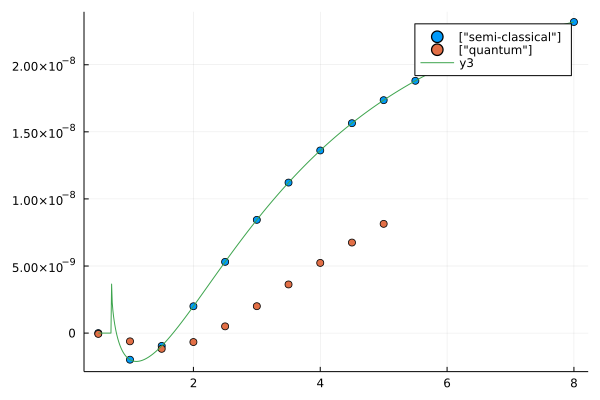

In [82]:
scatter(0.5:0.5:8.0,[ plotdata_semi_10 ], label = ["semi-classical"])
scatter!(0.5:0.5:5.0,[ plotdata_full_10], label = ["quantum" ])
plot!(0.5:0.01:8.0,[ plotdata_semi_fine_10 ])
#savefig("all_same.pdf")

In [83]:
rel_error_10 = abs.(abs.(plotdata_full_10 .- plotdata_semi_10[1:10]) ./ (plotdata_full_10))

10-element Array{Float64,1}:
 1.0
 2.2257761831054643
 0.1852304391323722
 3.989814011072182
 9.58783101331163
 3.210360340517901
 2.094473578744641
 1.6022451660425712
 1.3185105568048385
 1.132347649673748

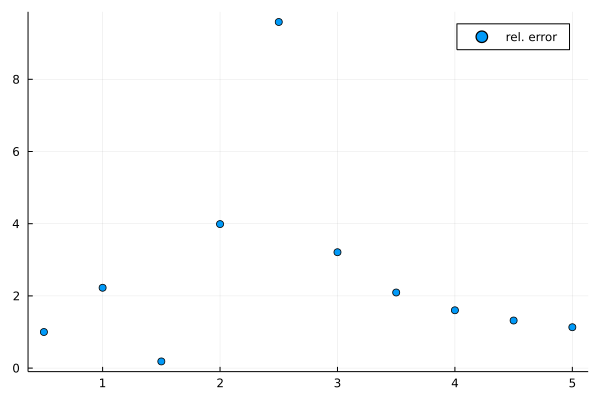

In [84]:
scatter(0.5:0.5:5.0,[ rel_error_10 ],label = "rel. error")
#savefig("all_same_error.pdf")

In [85]:
data[3,5,3] = 1.5307694532727233e-16 - 5.420478401793097e-11im;
data[4,6,4] = 2.99938419746834e-18 - 4.642897425521965e-12im;
data[5,7,5] = 2.2510974024340865e-18 - 6.276466102679734e-13im;
data[6,8,6] = 8.044105475627699e-20 - 1.168984341226275e-13im;
data[7,9,7] = 5.785912173577802e-20 - 2.7465938741605576e-14im;
#data[8,10,8] = 8.339972796728647e-17 - 4.6056591901432484e-11im;
#data[9,11,9] = 3.5615446369050864e-17 - 1.8071356921238964e-11im;
#data[1,3,8] = 1.5735405133456997e-17 - 7.81935583063174e-12im;
#data[1,3,9] = 7.519282041895174e-18 - 3.6743594759101844e-12im;

In [86]:
plotdata_full_11 = [real.(data[i,i+2,i] * exp(im * pi/2)) * (i/2.)^(21/2.) for i in 1:7]

7-element Array{Float64,1}:
 -8.653067749137884e-11
  1.1786208994923916e-9
  3.8282107491703575e-9
  6.723633672069417e-9
  9.464229841856105e-9
  1.1955888833646474e-8
  1.417453800733015e-8

In [87]:
plotdata_semi_11 = [VAmpSU2(i,i+1.,i) * i^(21/2.) for i in 0.5:0.5:6.0]

12-element Array{Float64,1}:
 1.1891051205156416e-10
 5.337555671851428e-9
 1.027024349871685e-8
 1.4327577563772591e-8
 1.7583039753499104e-8
 2.02115144574216e-8
 2.2362801593168867e-8
 2.4149348274610565e-8
 2.5653432484762627e-8
 2.6935436723296544e-8
 2.804021327202392e-8
 2.900157441558862e-8

In [88]:
plotdata_semi_fine_11 = [VAmpSU2(i,i+1.,i) * i^(21/2.) for i in 0.5:0.01:6.0]

551-element Array{Float64,1}:
 1.1891051205156416e-10
 2.224097343370271e-10
 3.2489991236934967e-10
 4.2666184360779754e-10
 5.279216440500181e-10
 6.288615422578967e-10
 7.296282710118498e-10
 8.303396640254429e-10
 9.310898927641582e-10
 1.0319536602349002e-9
 1.1329895859621045e-9
 1.234242957547828e-9
 1.3357479817096946e-9
 ⋮
 2.8800960455255322e-8
 2.8819438654321387e-8
 2.883786817815494e-8
 2.885624921598457e-8
 2.887458195607821e-8
 2.88928665857489e-8
 2.8911103291360705e-8
 2.89292922583347e-8
 2.8947433671154477e-8
 2.8965527713372506e-8
 2.8983574567615105e-8
 2.900157441558862e-8

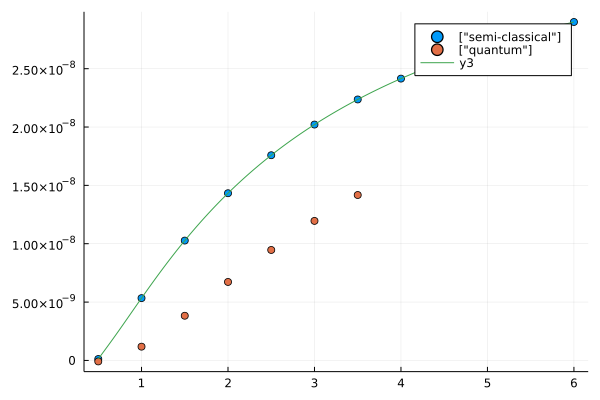

In [89]:
scatter(0.5:0.5:6.0,[ plotdata_semi_11 ], label = ["semi-classical"])
scatter!(0.5:0.5:3.5,[ plotdata_full_11 ], label = ["quantum"])
plot!(0.5:0.01:6.0,[ plotdata_semi_fine_11 ])

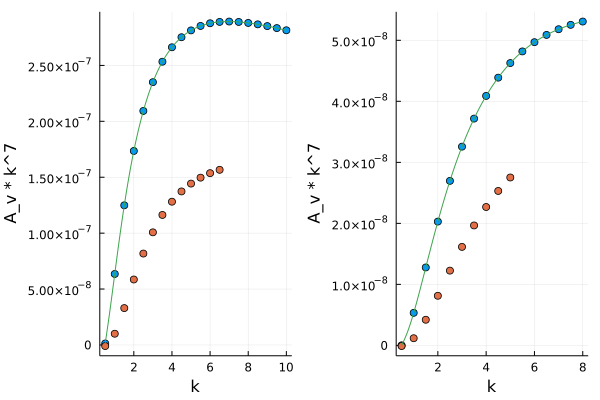

In [167]:
scatter(0.5:0.5:10.0,[ plotdata_semi_6], legend=false, xlabel = "k", ylabel = "A_v * k^7")
scatter!(0.5:0.5:6.5,[ plotdata_full_6] )
plot_3_1 = plot!(0.5:0.01:10., plotdata_semi_fine_6)
#savefig("all_same.pdf")

scatter(0.5:0.5:8.0,[ plotdata_semi_7], label = ["semi-classical" ],legend = false , xlabel = "k", ylabel = "A_v * k^7")
scatter!(0.5:0.5:5.0, plotdata_full_7, label = "quantum")
plot_3_2 = plot!(0.5:0.01:8., plotdata_semi_fine_7)
#savefig("all_same.pdf")

scatter(0.5:0.5:6.0,[ plotdata_semi_11 ], label = ["semi-classical"], legend = false , xlabel = "j", ylabel = "A_v * j^(21/2)")
scatter!(0.5:0.5:3.5,[ plotdata_full_11 ], label = ["quantum"])
plot_3_3 = plot!(0.5:0.01:6.0,[ plotdata_semi_fine_11 ])

frusta_diff_1_small = plot(plot_3_1, plot_3_2, layout = (1,2))

In [168]:
savefig(frusta_diff_1_small,"frusta_diff_1_small.pdf")

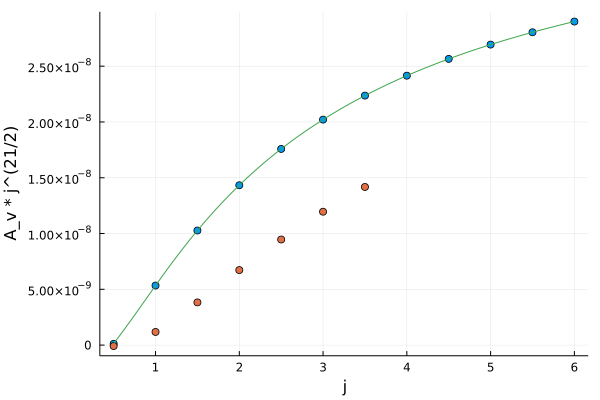

In [92]:
frusta_diff_1_large = plot(plot_3_3)

In [93]:
savefig(frusta_diff_1_large,"frusta_diff_1_large.pdf")

In [94]:
data[3,7,3] = 1.8223549404555138e-11 + 1.38226899498688e-16im;
data[4,8,4] = 4.891302489412828e-13 - 2.6786911150425742e-20im;
data[5,9,5] = -3.939139923801509e-14 - 6.711360386647187e-20im;
data[6,10,6] = -2.1744594914973584e-14 - 2.4039595057680455e-21im;
#data[7,11,7] = ;

In [95]:
plotdata_full_12 = [real.(data[i,i+4,i] * exp(im * pi)) * (i/2.)^(21/2.) for i in 1:6]

6-element Array{Float64,1}:
 -3.3730165362836314e-11
 -6.151081891159678e-10
 -1.2870374632519007e-9
 -7.08336262983363e-10
  5.939795580537264e-10
  2.223947322197502e-9

In [96]:
[real.(data[i,i+4,i] * exp(im * pi))  for i in 1:6]

6-element Array{Float64,1}:
 -4.8846497092823365e-8
 -6.151081891159678e-10
 -1.8223549404555138e-11
 -4.891302489412828e-13
  3.939139923801509e-14
  2.1744594914973584e-14

In [97]:
plotdata_semi_12 = [VAmpSU2(i,i+2.,i) * i^(21/2.) for i in 0.5:0.5:5.0]

10-element Array{Float64,1}:
  0.0
 -1.984201346483421e-9
 -1.0153461372703844e-9
  1.8088708230536424e-9
  4.905393870750362e-9
  7.831579809896614e-9
  1.0468374727741673e-8
  1.2805359834365518e-8
  1.4867456425165207e-8
  1.6688533287737573e-8

In [98]:
plotdata_semi_fine_12 = [VAmpSU2(i,i+2.,i) * i^(21/2.) for i in 0.5:0.01:5.0]

451-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 1.630683197549248e-8
 1.6341955788176503e-8
 1.6376994082732755e-8
 1.6411947120172394e-8
 1.6446815160915847e-8
 1.6481598464788147e-8
 1.6516297291013954e-8
 1.6550911898213194e-8
 1.6585442544396858e-8
 1.6619889486962276e-8
 1.6654252982689627e-8
 1.6688533287737573e-8

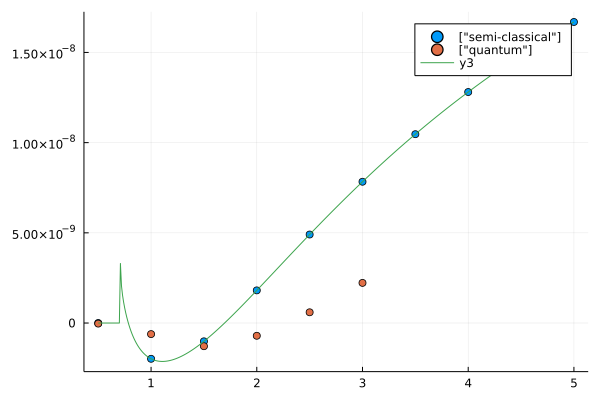

In [99]:
scatter(0.5:0.5:5.0,[ plotdata_semi_12 ], label = ["semi-classical"])
scatter!(0.5:0.5:3.0,[ plotdata_full_12 ], label = ["quantum"])
plot!(0.5:0.01:5.0,[ plotdata_semi_fine_12 ])

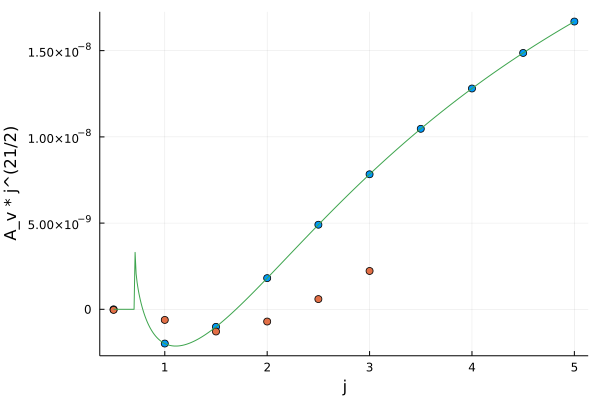

In [169]:
scatter(0.5:0.5:8.0, plotdata_semi_8 , label = "semi-classical", legend = false, xlabel = "k", ylabel = "A_v * k^7")
scatter!(0.5:0.5:6.0, plotdata_full_8, label = "quantum")
plot_4_1 = plot!(0.5:0.01:8.0, plotdata_semi_fine_8)
#savefig("all_same.pdf")

scatter(0.5:0.5:8.0,[ plotdata_semi_10 ], label = ["semi-classical"], legend = false, xlabel = "k", ylabel = "A_v * k^7")
scatter!(0.5:0.5:5.0,[ plotdata_full_10], label = ["quantum" ])
plot_4_2 = plot!(0.5:0.01:8.0,[ plotdata_semi_fine_10 ])
#savefig("all_same.pdf")

scatter(0.5:0.5:5.0,[ plotdata_semi_12 ], label = ["semi-classical"], legend = false, xlabel = "j", ylabel = "A_v * j^(21/2)")
scatter!(0.5:0.5:3.0,[ plotdata_full_12 ], label = ["quantum"])
plot_4_3 = plot!(0.5:0.01:5.0,[ plotdata_semi_fine_12 ])

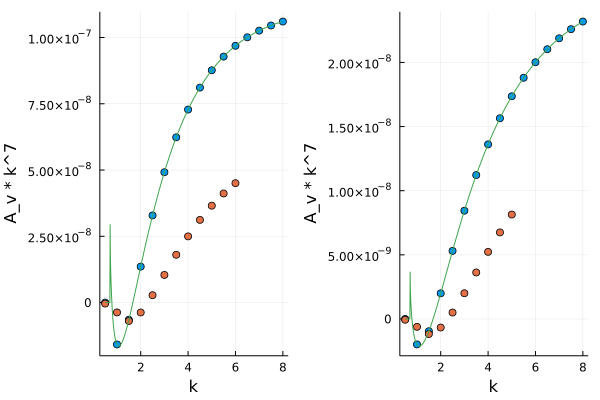

In [170]:
frusta_diff_2_small = plot(plot_4_1,plot_4_2, layout = (1,2))

In [171]:
savefig(frusta_diff_2_small,"frusta_diff_2_small.pdf")

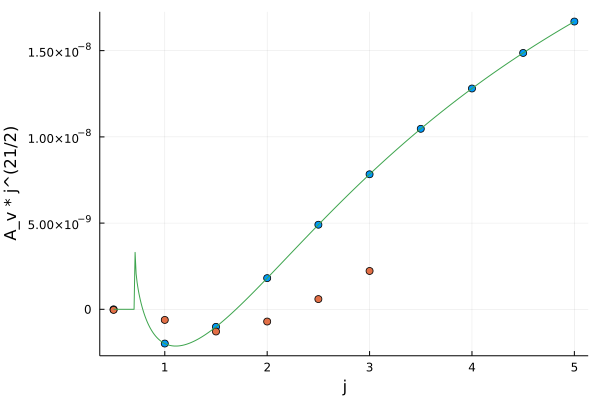

In [103]:
frusta_diff_2_large = plot(plot_4_3)

In [104]:
savefig(frusta_diff_2_large,"frusta_diff_2_large.pdf")

In [105]:
data[1,5,1] = 4.884649709282336e-8 - 8.691691346934908e-15im;
data[2,10,2] = 8.202502632460601e-12 - 7.815294169178751e-18im;
data[2,8,2] = 4.67616648741247e-16 - 3.096316446345705e-10im;

In [106]:
plotdata_full_13 = [real.(data[2,i,2] * exp(im * (i-2)/2 * pi/2)) * (i/2)^(5/2.) for i in 2:2:10]

5-element Array{Float64,1}:
  1.4181788658240369e-8
  6.667286643834067e-9
 -9.588587721304877e-9
 -9.908212628306256e-9
  4.5853383679507193e-10

In [107]:
plotdata_semi_13 = [VAmpSU2(1.0,i,1.0) * i^(5/2.)  for i in 1.0:1.0:6.0]

6-element Array{Float64,1}:
  4.264682761088191e-8
  3.019377448421491e-8
 -3.093063790100277e-8
  0.0
  0.0
  0.0

In [108]:
plotdata_semi_fine_13 = [VAmpSU2(1.0,i,1.0) * i^(5/2.)  for i in 1.0:0.01:6.0]

501-element Array{Float64,1}:
 4.264682761088191e-8
 4.25931376356446e-8
 4.253874027112291e-8
 4.2483714290231664e-8
 4.242813260659601e-8
 4.2372062391311894e-8
 4.2315565188016066e-8
 4.2258697026182464e-8
 4.220150853257274e-8
 4.2144045040777636e-8
 4.208634669879503e-8
 4.202844857459951e-8
 4.1970380759665264e-8
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

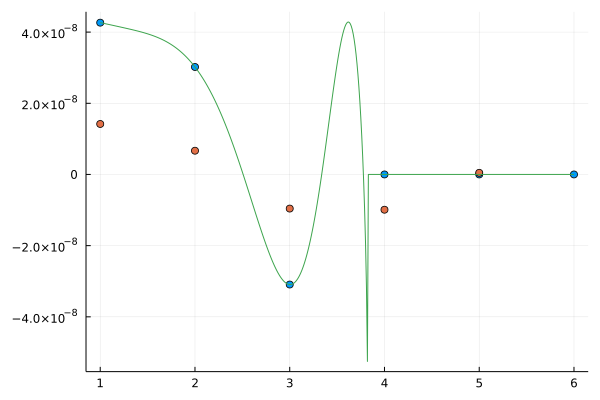

In [109]:
scatter(1.:1.:6.,plotdata_semi_13, label = "semi-classical", legend = false)
scatter!(1.:1.:5.,plotdata_full_13, label = "quantum")
plot!(1.0:0.01:6.0,plotdata_semi_fine_13)

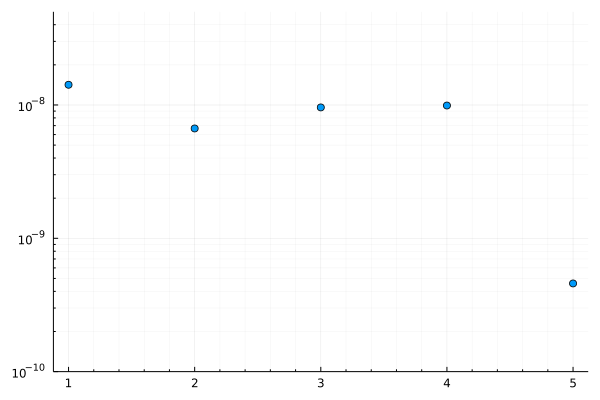

In [110]:
scatter(1.:1.:5.,abs.(plotdata_full_13), yscale = :log10, yrange = (1e-10,5e-8), minorgrid = true, legend = false)

In [111]:
data[3,1,3] = 4.5068598912767505e-17 + 1.930231306524873e-9im;
data[3,9,3] = -6.031445389606266e-18 + 5.509489236686633e-12im;
data[3,11,3] = -9.770744605387672e-12 + 4.657680199613679e-18im;

In [112]:
plotdata_full_14 = [real.(data[3,i,3] * exp(im * (i-3)/2 * pi/2)) * (i/2)^(5/2.)  for i in 1:2:11]

6-element Array{Float64,1}:
  3.412199115255768e-10
  7.77083305942473e-10
  5.356580549192347e-10
 -4.1764095423711074e-10
  2.3666967990822637e-10
 -6.931614240450915e-10

In [113]:
plotdata_semi_14 = [VAmpSU2(1.5,i,1.5) * i^(5/2.)  for i in 0.5:1.0:10.0]

10-element Array{Float64,1}:
  1.2920619395965461e-9
  1.6640127828662955e-9
  1.4370521939686376e-9
 -3.294776894676702e-10
  1.2792933808846548e-10
 -1.3922171273553431e-9
  0.0
  0.0
  0.0
  0.0

In [114]:
plotdata_semi_fine_14 = [VAmpSU2(1.5,i,1.5) * i^(5/2.)  for i in 0.5:0.01:10.0]

951-element Array{Float64,1}:
 1.2920619395965461e-9
 1.3089127008844891e-9
 1.3253230851206097e-9
 1.341295844078428e-9
 1.3568340608139969e-9
 1.3719411309568329e-9
 1.38662074456234e-9
 1.4008768685190776e-9
 1.4147137295038416e-9
 1.4281357974771102e-9
 1.4411477697110672e-9
 1.453754555342088e-9
 1.4659612604392962e-9
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

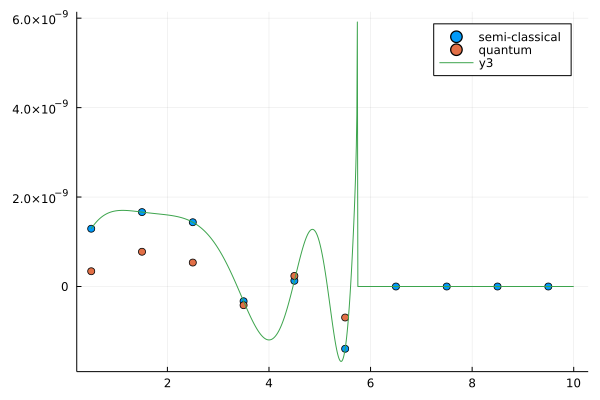

In [115]:
scatter(0.5:1.0:10.,plotdata_semi_14, label = "semi-classical")
scatter!(0.5:1.0:5.5,plotdata_full_14, label = "quantum")
plot!(0.5:0.01:10.0,plotdata_semi_fine_14)

In [116]:
data[4,2,4] = 2.15242345403009e-18 + 6.353118268713702e-11im;
data[4,10,4] = 1.1371380392634794e-19 - 1.0216248081127295e-12im;

In [117]:
plotdata_full_15 = [real.(data[4,i,4] * exp(im * (i-4)/2 *pi/2)) * (i/2)^(5/2.)  for i in 2:2:10]

5-element Array{Float64,1}:
  6.353118268713702e-11
  9.203532478194673e-11
  7.237560811801303e-11
 -1.565216796612105e-11
 -5.7110562961006046e-11

In [118]:
plotdata_semi_15 = [VAmpSU2(2.0,i,2.0) * i^(5/2.)  for i in 1.0:1.0:9.0]

9-element Array{Float64,1}:
  1.585303144143768e-10
  1.665891703550074e-10
  1.5422719166627062e-10
  3.997077578974131e-11
 -1.1950973389279493e-10
  1.1869767603440957e-10
  3.504776928611832e-11
  0.0
  0.0

In [119]:
plotdata_semi_fine_15 = [VAmpSU2(2.0,i,2.0) * i^(5/2.)  for i in 1.0:0.01:9.0]

801-element Array{Float64,1}:
 1.585303144143768e-10
 1.5918549636046275e-10
 1.5981894794709196e-10
 1.6043098802368356e-10
 1.6102193954746418e-10
 1.6159212921020395e-10
 1.6214188707617675e-10
 1.6267154623117516e-10
 1.6318144244241046e-10
 1.6367191382912475e-10
 1.6414330054374023e-10
 1.645959444633653e-10
 1.6503018889147948e-10
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

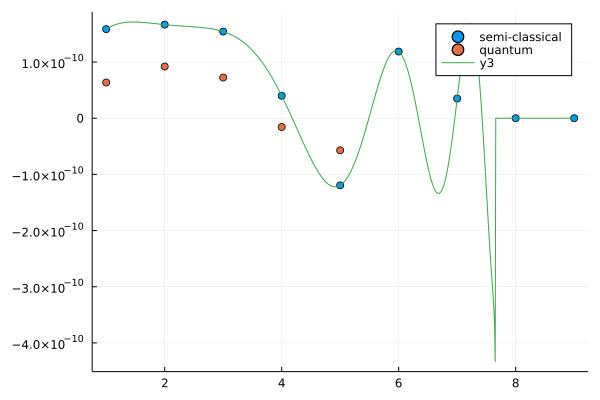

In [120]:
scatter(1.0:1.0:9.,plotdata_semi_15, label = "semi-classical")
scatter!(1.0:1.0:5.,plotdata_full_15, label = "quantum")
plot!(1.0:0.01:9.0,plotdata_semi_fine_15)

In [121]:
plotdata_semi_16 = [VAmpSU2(2.5,i,2.5) * i^(5/2.) for i in 0.5:1.0:12.0]

12-element Array{Float64,1}:
  9.520210839159773e-12
  2.8184673855633967e-11
  2.7949024943067566e-11
  2.672353940364084e-11
  1.3974461369770557e-11
 -1.7672169813827582e-11
  3.258299275979922e-12
 -5.45307891962719e-12
  2.3244898341881288e-11
  4.0814784352666627e-11
  0.0
  0.0

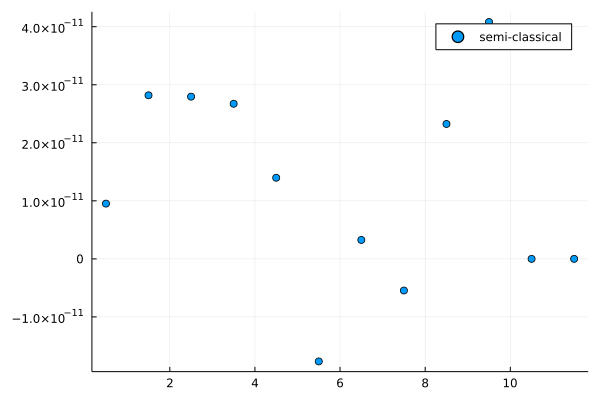

In [122]:
scatter(0.5:1.0:12., plotdata_semi_16, label="semi-classical")

In [123]:
plotdata_semi_17 = [VAmpSU2(3.0,i,3.0) * i^(5/2.) for i in 1.0:1.0:12.0]

12-element Array{Float64,1}:
  3.858767726994424e-12
  6.6956417743457984e-12
  6.5000499330714676e-12
  6.323764094347338e-12
  4.280566165137405e-12
 -2.3547956312280427e-12
 -3.4715854091819135e-12
  4.595125381290778e-12
 -4.4209640409386105e-12
  1.0249853407356528e-13
  2.8299388176379505e-12
  0.0

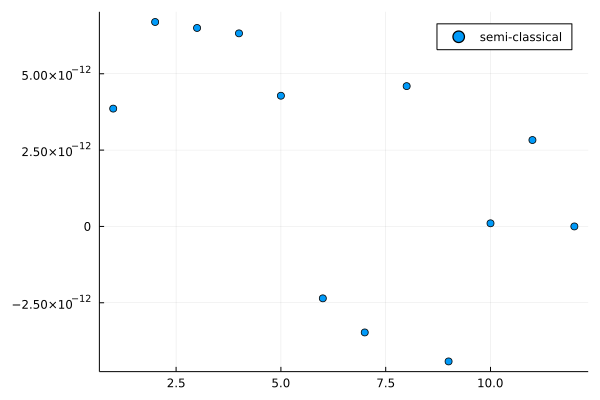

In [124]:
scatter(1.0:1.0:12., plotdata_semi_17, label = "semi-classical")

In [125]:
plotdata_semi_18 = [VAmpSU2(0.5,3.5,i) * i^(14/2) for i in 0.5:0.5:10.0]

20-element Array{Float64,1}:
  0.0
  0.0
  5.957301296115078e-10
 -1.5018409339587023e-8
 -1.6513875890210784e-8
 -1.1101813511725339e-8
 -3.3654036840882883e-9
  4.633322301385026e-9
  1.2065484345800638e-8
  1.8656160391576267e-8
  2.436928027723912e-8
  2.9265066794431403e-8
  3.3436273378640423e-8
  3.698034948538877e-8
  3.998803681061852e-8
  4.25394427868635e-8
  4.4703435369714036e-8
  4.653842033321606e-8
  4.809360240127706e-8
  4.941032462337831e-8

In [126]:
plotdata_semi_fine_18 = [VAmpSU2(0.5,3.5,i) * i^(14/2) for i in 0.5:0.01:10.0]

951-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 4.913924491464335e-8
 4.916430407434635e-8
 4.918927934287094e-8
 4.921417098242997e-8
 4.923897925432718e-8
 4.9263704418962634e-8
 4.928834673583344e-8
 4.9312906463536924e-8
 4.933738385977611e-8
 4.936177918136287e-8
 4.938609268421791e-8
 4.941032462337831e-8

In [127]:
#data[1,7,1] = ;
data[1,7,2] = 1.3713867326792975e-14 - 1.5378757692398877e-9im;
data[1,7,3] = -7.031169725738041e-16 + 9.392270450356847e-11im;
data[1,7,4] = 2.724340596348363e-16 - 3.826376542347965e-11im;
data[1,7,5] = 1.0833366433782753e-16 - 1.535661147869799e-11im;
data[1,7,6] = 3.3683914099941715e-17 - 4.828953098550518e-12im;
data[1,7,7] = 1.0047520308454107e-17 - 1.4625158805534697e-12im;
data[1,7,8] = 2.800129588975776e-18 - 4.2109281100884845e-13im;
data[1,7,9] = 6.260215944939412e-19 - 9.999369857549899e-14im;
data[1,7,10] = -7.454939657631646e-21 - 4.476863312857556e-15im;
data[1,7,11] = -1.5877894719572234e-19 + 1.9750316417708278e-14im;
data[1,7,12] = -1.6626302511271697e-19 + 2.213734887118436e-14im;
data[1,7,13] = -1.373818522525438e-19 + 1.867497425090369e-14im;

In [128]:
plotdata_full_18 = [real.(data[1,7,i] * exp(im * 3*pi/2)) * (i/2)^(14/2) for i in 1:1:13]

13-element Array{Float64,1}:
  0.0
 -1.5378757692398877e-9
  1.6047574589789394e-9
 -4.8977619742053955e-9
 -9.372931810728755e-9
 -1.0560920426529982e-8
 -9.409724342333172e-9
 -6.899184615568973e-9
 -3.7364590662652795e-9
 -3.4975494631699655e-10
  3.006857760437411e-9
  6.1970408936038654e-9
  9.154897962948379e-9

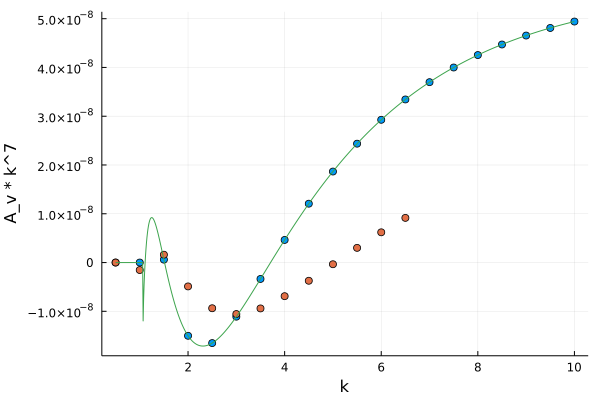

In [172]:
scatter(0.5:0.5:10., plotdata_semi_18, legend = false, xlabel = "k", ylabel = "A_v * k^7")
scatter!(0.5:0.5:6.5, plotdata_full_18)
frusta_diff_3 = plot!(0.5:0.01:10.0, plotdata_semi_fine_18)

In [173]:
savefig(frusta_diff_3,"frusta_diff_3.pdf")

In [131]:
plotdata_semi_19 = [VAmpSU2(0.5,4.5,i) * i^(14/2) for i in 0.5:0.5:10.0]

20-element Array{Float64,1}:
  0.0
  0.0
 -5.65840134116465e-9
  7.091859578841953e-9
  1.0309298827885247e-9
 -8.985303481027984e-9
 -1.4650915940808967e-8
 -1.609549128633235e-8
 -1.4801648562887959e-8
 -1.2000273939970975e-8
 -8.496201383344948e-9
 -4.769902314855429e-9
 -1.0918943491092865e-9
  2.395092652531635e-9
  5.623663851655597e-9
  8.56974830815633e-9
  1.1233454443166218e-8
  1.3627751842076967e-8
  1.577184892468234e-8
  1.7687373095713182e-8

In [132]:
plotdata_semi_fine_19 = [VAmpSU2(0.5,4.5,i) * i^(14/2) for i in 0.5:0.01:10.0]

951-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 1.7284446518916664e-8
 1.7321495484704723e-8
 1.735846007224529e-8
 1.739534045609712e-8
 1.743213681068724e-8
 1.7468849310302345e-8
 1.7505478129091326e-8
 1.7542023441060326e-8
 1.757848542006965e-8
 1.7614864239832375e-8
 1.7651160073910565e-8
 1.7687373095713182e-8

In [133]:
#data[1,7,1] = ;
data[1,9,2] = 3.5562798373786586e-11 + 1.1221262004751379e-15im;
data[1,9,3] = -1.2102270959728276e-10 - 2.1762797132761486e-16im;
data[1,9,4] = 1.9720792542289553e-11 + 4.473777700891124e-17im;
data[1,9,5] = 4.271341131036889e-12 + 6.95290060068393e-18im;
data[1,9,6] = -7.405736595328909e-13 - 3.0198739517883336e-18im;
data[1,9,7] = -9.327571517564152e-13 - 2.721760175685569e-18im;
data[1,9,8] = -5.51522501376481e-13 - 1.5000346113594482e-18im;
#data[1,9,9] = ;
data[1,9,10] = -1.3944913765400628e-13 - 3.6125798330883853e-19im;
data[1,9,11] = -6.802689065709604e-14 - 1.7257659795872285e-19im;
data[1,9,12] = -3.299369818015076e-14 - 8.374608848427774e-20im;
data[1,9,13] = -1.58674953230259e-14 - 4.24992595985491e-20im;

In [134]:
plotdata_full_19 = [real.(data[1,9,i] * exp(im * 4*pi/2)) * (i/2)^(14/2) for i in 1:1:13]

13-element Array{Float64,1}:
  0.0
  3.5562798373786586e-11
 -2.0677864522598236e-9
  2.524261445413063e-9
  2.6070197332988825e-9
 -1.6196345933984324e-9
 -6.001293929913542e-9
 -9.036144662552265e-9
 -1.0584166896806553e-8
 -1.0894463879219242e-8
 -1.035665352213385e-8
 -9.236123893758683e-9
 -7.77860781268993e-9

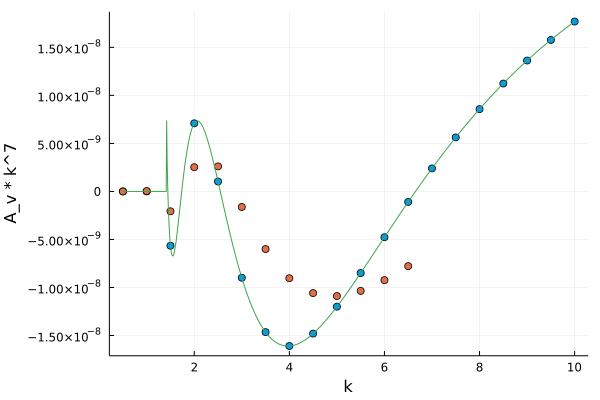

In [174]:
scatter(0.5:0.5:10., plotdata_semi_19, legend = false, xlabel = "k", ylabel = "A_v * k^7")
scatter!(0.5:0.5:6.5, plotdata_full_19)
frusta_diff_4 = plot!(0.5:0.01:10.0, plotdata_semi_fine_19)

In [175]:
savefig(frusta_diff_4,"frusta_diff_4.pdf")

In [137]:
plotdata_semi_20 = [VAmpSU2(0.5,5.5,i) * i^(14/2) for i in 0.5:0.5:9.0]

18-element Array{Float64,1}:
  0.0
  0.0
  0.0
  8.885532702660098e-10
 -1.0910093898841562e-9
  6.426220904900409e-9
  4.552196532041948e-9
 -1.404934747229845e-9
 -7.1487827078845824e-9
 -1.1194306288929773e-8
 -1.3418407338094014e-8
 -1.4154154773911639e-8
 -1.3809400786485922e-8
 -1.2737751915167242e-8
 -1.1210520484321948e-8
 -9.42354647503869e-9
 -7.512924312882527e-9
 -5.5704657082145784e-9

In [138]:
plotdata_semi_fine_20 = [VAmpSU2(0.5,5.5,i) * i^(14/2) for i in 0.5:0.01:9.0]

851-element Array{Float64,1}:
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮
 -5.997076543616651e-9
 -5.95824717795811e-9
 -5.91942591568843e-9
 -5.880613167201375e-9
 -5.841809339171544e-9
 -5.803014834584182e-9
 -5.764230052760051e-9
 -5.725455389383188e-9
 -5.68669123652731e-9
 -5.647937982681977e-9
 -5.6091960127782534e-9
 -5.5704657082145784e-9

In [139]:
data[1,11,3] = -9.928908216543502e-18 - 1.0050692064642665e-11im;
data[1,11,4] = -5.158344724064076e-18 - 2.0986052762378303e-12im;
data[1,11,5] = 2.511770858024836e-18 + 2.291586928404903e-12im;
data[1,11,6] = -8.513369663301099e-21 - 1.1691930303075155e-12im;
data[1,11,7] = -2.4471037336824466e-19 - 5.895618230186175e-13im;
data[1,11,8] = -1.3144421259274521e-19 - 1.2530657055178932e-13im;
data[1,11,9] = -4.821721790720608e-20 + 2.5171565923085374e-14im;
data[1,11,10] = -1.3575343352213936e-20 + 5.075319255039752e-14im;
data[1,11,11] = -1.51770095550521e-21 + 4.2348522276035234e-14im;
data[1,11,12] = 2.0339800638406602e-21 + 2.936073696576104e-14im;
data[1,11,13] = 2.6040402244094825e-21 + 1.8982883146721672e-14im;

In [140]:
plotdata_full_20 = [real.(data[1,11,i] * exp(im * 5*pi/2)) * (i/2)^(14/2) for i in 1:1:13]

13-element Array{Float64,1}:
  0.0
  0.0
  1.7172549644823053e-10
  2.686214753584423e-10
 -1.3986736623565082e-9
  2.5570251572825365e-9
  3.793199315736104e-9
  2.053022851920516e-9
 -9.405845272779198e-10
 -3.965093167999807e-9
 -6.447288243675061e-9
 -8.219127263247282e-9
 -9.305841920633425e-9

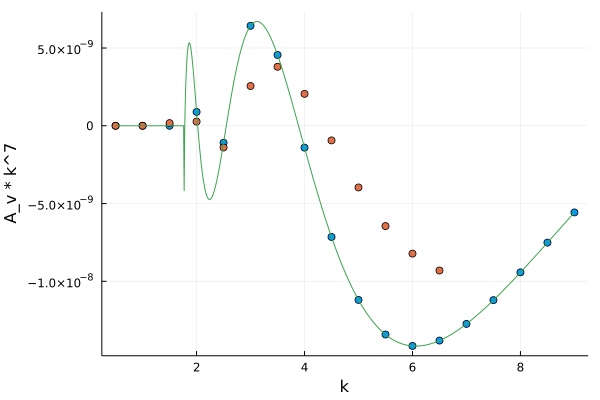

In [176]:
scatter(0.5:0.5:9., plotdata_semi_20, legend = false, xlabel = "k", ylabel = "A_v * k^7")
scatter!(0.5:0.5:6.5, plotdata_full_20)
frusta_diff_5 = plot!(0.5:0.01:9.0, plotdata_semi_fine_20)

In [177]:
savefig(frusta_diff_5,"frusta_diff_5.pdf")

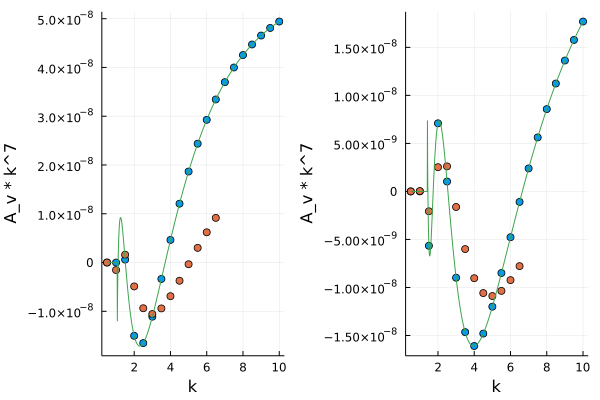

In [178]:
frusta_diff_3_4 = plot(frusta_diff_3,frusta_diff_4, layout = (1,2))

In [179]:
savefig(frusta_diff_3_4,"frusta_diff_3_4.pdf")

In [144]:
data[2,6,2] = 6.151081891159667e-10 + 7.31343565609025e-16im;
data[3,9,3] = -6.0314454300399826e-18 + 5.509489236686593e-12im;

In [145]:
plotdata_full_21 = [ real.(data[i,3*i,i] * exp(im * i*pi/2)) * (i/2)^(21/2) for i in 1:1:3]

3-element Array{Float64,1}:
 -8.653067749137884e-11
 -6.151081891159667e-10
  3.8910746164664965e-10

In [146]:
plotdata_semi_21 = [VAmpSU2(i,3*i,i) * i^(21/2) for i in 0.5:0.5:3.0]

6-element Array{Float64,1}:
  1.1891051205156416e-10
 -1.984201346483421e-9
  2.103279982169316e-10
  1.949301623769582e-9
 -5.337755978324096e-10
 -1.8607322439737871e-9

In [147]:
plotdata_semi_fine_21 = [VAmpSU2(i,3*i,i) * i^(21/2) for i in 0.5:0.01:3.0]

251-element Array{Float64,1}:
  1.1891051205156416e-10
  5.3326117377674757e-11
 -1.2316615917679445e-11
 -7.794587487008357e-11
 -1.4348986125601607e-10
 -2.088768701398992e-10
 -2.7403536831910367e-10
 -3.388940725810606e-10
 -4.033820276868885e-10
 -4.674286839962604e-10
 -5.309639746484482e-10
 -5.939183922153416e-10
 -6.56223064742303e-10
  ⋮
 -1.9846597972006736e-9
 -1.98413175325614e-9
 -1.9814330747898816e-9
 -1.976566714148502e-9
 -1.9695379951167653e-9
 -1.960354607093399e-9
 -1.9490265966789054e-9
 -1.9355663566846135e-9
 -1.9199886125749735e-9
 -1.9023104063579517e-9
 -1.8825510779411004e-9
 -1.8607322439737871e-9

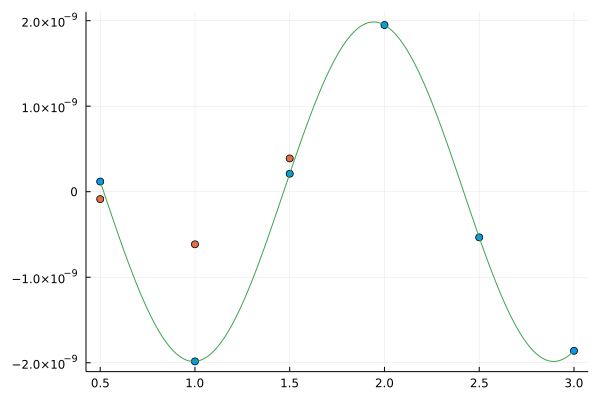

In [148]:
scatter(0.5:0.5:3., plotdata_semi_21, legend = false)
scatter!(0.5:0.5:1.5, plotdata_full_21)
plot!(0.5:0.01:3.0, plotdata_semi_fine_21)

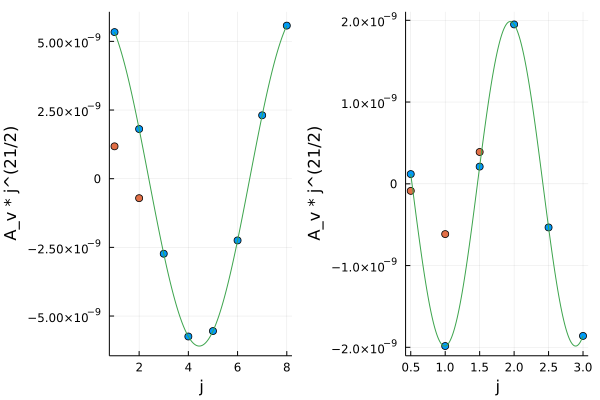

In [149]:
scatter(1.0:1.0:8.0,[ plotdata_semi_2 ], label = ["semi-classical"], legend = false, xlabel = "j", ylabel = "A_v * j^(21/2)")
scatter!(1.0:1.0:2.0,[ plotdata_full_2], label = ["quantum" ])
frusta_uniform_scaling = plot!(1.0:0.01:8.0, [ plotdata_semi_fine_2 ])

scatter(0.5:0.5:3., plotdata_semi_21, legend = false, xlabel = "j", ylabel = "A_v * j^(21/2)")
scatter!(0.5:0.5:1.5, plotdata_full_21)
frusta_uniform_scaling_2 = plot!(0.5:0.01:3.0, plotdata_semi_fine_21)

frusta_uniform_scaling_new = plot(frusta_uniform_scaling,frusta_uniform_scaling_2, layout = (1,2))

In [150]:
savefig(frusta_uniform_scaling_new,"frusta_uniform_scaling_new.pdf")

In [151]:
plotdata_semi_21 = [VAmpSU2(i,4*i,i) * i^(21/2) for i in 0.5:0.5:8.0]

16-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [152]:
data[1,5,1] = 4.884649709282336e-8 - 8.691691346934908e-15im;
data[2,10,2] = 8.202502632460601e-12 - 7.815294169178751e-18im;
data[2,8,2] = 4.67616648741247e-16 - 3.096316446345705e-10im;

In [153]:
plotdata_semi_22 = [VAmpSU2(i,5*i,i) * i^(21/2) for i in 0.5:0.5:4.0]

8-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [154]:
plotdata_full_22 = [real.(data[i,5*i,i] * exp(im * 2*i * pi/2)) * (i/2)^(21/2) for i in 1:1:2]

2-element Array{Float64,1}:
 -3.373016536283631e-11
  8.202502632460601e-12

In [155]:
plotdata_full_23 = [real.(data[i,4*i,i] * exp(im * 3/2*i * pi/2)) * (i/2)^(21/2) for i in 2:2:2]

1-element Array{Float64,1}:
 -3.096316446345705e-10

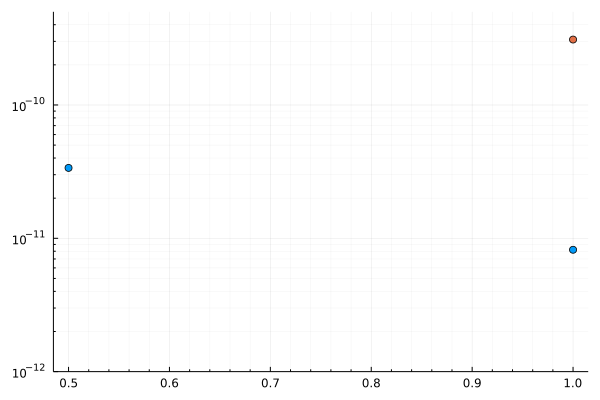

In [156]:
scatter(0.5:0.5:1., abs.(plotdata_full_22), legend = false, yscale = :log10, yrange = (1e-12,5e-10), minorgrid = true)
scatter!(1.:1.:1., abs.(plotdata_full_23))

In [157]:
plotdata_semi_24 = [VAmpSU2(0.5,i,0.5) * i^3 for i in 0.5:1.0:2.5]

3-element Array{Float64,1}:
 7.719900415935558e-6
 5.811777521926896e-7
 0.0

In [158]:
plotdata_full_24 = [real.(data[1,i,1] * exp(im * (i-1)/2 * pi/2)) * (i/2)^3 for i in 1:2:5]

3-element Array{Float64,1}:
  7.895226586741586e-7
 -4.2292059610627677e-7
 -7.63226517075365e-7

In [159]:
plotdata_semi_fine_24 = [VAmpSU2(0.5,i,0.5) * i^3 for i in 0.5:0.01:2.5]

201-element Array{Float64,1}:
 7.719900415935558e-6
 7.776616703794414e-6
 7.831046664637996e-6
 7.88330541756498e-6
 7.933502332186998e-6
 7.981741002121063e-6
 8.028119236338615e-6
 8.07272906596564e-6
 8.11565676435156e-6
 8.156982878428863e-6
 8.196782269571403e-6
 8.23512416232968e-6
 8.272072199576648e-6
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

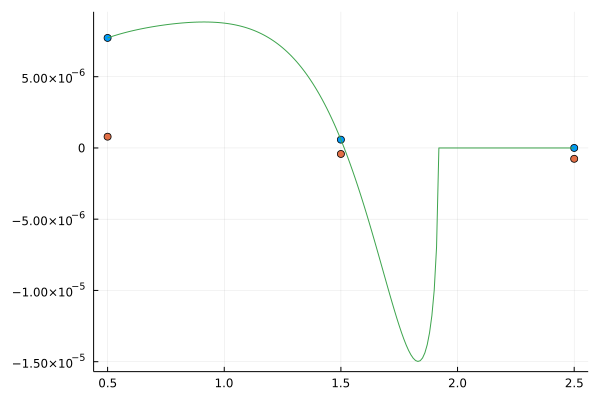

In [160]:
scatter(0.5:1.0:2.5, plotdata_semi_24, legend=false)
scatter!(0.5:1.0:2.5, plotdata_full_24, legend=false)
plot!(0.5:0.01:2.5,plotdata_semi_fine_24)

In [161]:
plotdata_semi_25 = [VAmpSU2(0.5,i,1.0) * i^3 for i in 0.5:1.0:4.5]

5-element Array{Float64,1}:
  1.5365724657097954e-7
  2.1429299052461527e-7
 -2.4699555401518814e-7
  0.0
  0.0

In [162]:
plotdata_full_25 = [real.(data[1,i,2] * exp(im * (i-1)/2 * pi/2)) * (i/2)^3 for i in 1:2:9]

5-element Array{Float64,1}:
  0.0
  3.3910960494371546e-8
 -5.812105341706197e-8
 -6.593642360616018e-8
  3.2406600018113025e-9

In [163]:
plotdata_semi_fine_25 = [VAmpSU2(0.5,i,1.0) * i^3 for i in 0.5:0.01:4.5]

401-element Array{Float64,1}:
 1.5365724657097954e-7
 1.5599574754133457e-7
 1.5829251925464455e-7
 1.6054822667762486e-7
 1.6276354068683698e-7
 1.6493913483387003e-7
 1.6707568235093554e-7
 1.6917385338046399e-7
 1.712343124135171e-7
 1.7325771592294748e-7
 1.7524471017825172e-7
 1.7719592922999652e-7
 1.7911199305254217e-7
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

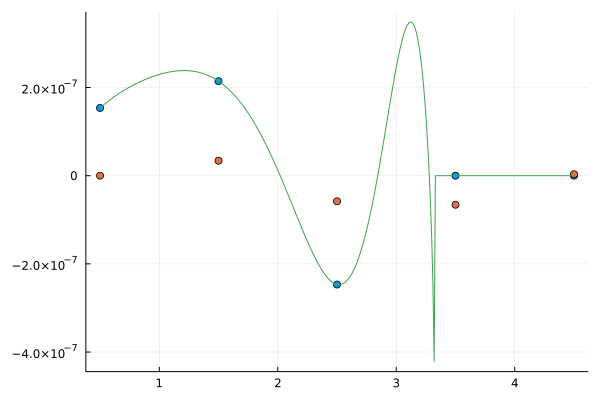

In [164]:
scatter(0.5:1.0:4.5, plotdata_semi_25, legend=false)
scatter!(0.5:1.0:4.5, plotdata_full_25, legend=false)
plot!(0.5:0.01:4.5,plotdata_semi_fine_25)

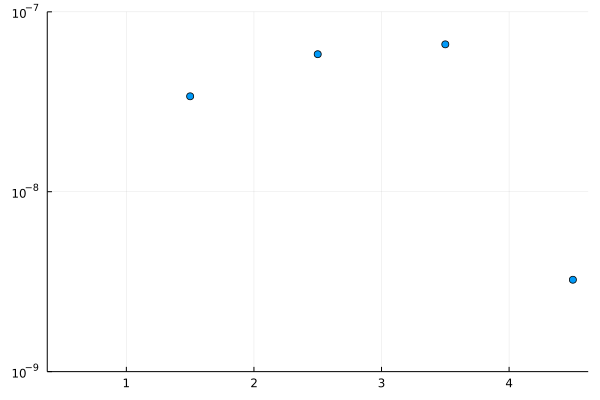

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/ssteinha/.julia/packages/Plots/AJMX6/src/utils.jl:95


In [165]:
scatter(0.5:1.0:4.5, abs.(plotdata_full_25), legend=false, yscale = :log10, yrange = (1e-9,1e-7))